# **Predictive Maintenance for Industrial Equipment**

**Prepared by:** Neysha Pagán Vargas, Charles Hohl, Monica Fam

**Group:** 4

**Date:** August 13, 2024


## **INTRODUCTION**

Predictive maintenance has become a crucial component in modern industrial operations, allowing organizations to anticipate equipment failures and optimize maintenance schedules, thus reducing downtime and operational costs. The dataset provided by Matzka (2020) on Kaggle, titled "Predictive Maintenance Dataset AI4I 2020," offers a comprehensive collection of data specifically designed for developing and testing predictive maintenance models. This dataset includes a diverse array of features related to the operational state and maintenance history of machinery, making it a valuable resource for researchers and practitioners in the field of industrial engineering and data science.

The AI4I 2020 dataset comprises a detailed set of records capturing various operational conditions, maintenance activities, and failure occurrences across different machines. By leveraging this dataset, analysts can build predictive models to forecast equipment failures, identify patterns and anomalies, and ultimately enhance the efficiency of maintenance strategies. The dataset’s structured format and extensive feature set facilitate the development of advanced predictive algorithms and provide insights into the operational dynamics of industrial equipment.

Given the growing importance of predictive maintenance in minimizing unplanned downtime and extending the lifespan of machinery, this dataset serves as a vital tool for advancing research and innovation in this domain. Its application extends to various industries, including manufacturing, transportation, and energy, where predictive maintenance can lead to significant cost savings and operational improvements. As such, the AI4I 2020 dataset represents a valuable asset for both academic research and practical implementation in predictive maintenance systems.

## **PROJECT OVERVIEW**

The solution involves analyzing a large dataset of sensor readings from industrial equipment. We will apply machine learning algorithms to identify patterns and signals indicative of impending equipment failures. The project will include data preprocessing, exploratory data analysis (EDA), feature engineering, model building, and evaluation. Visualizations will be created to demonstrate key findings and the model's predictive capabilities.

We will use the Predictive Maintenance Dataset from Kaggle, containing sensor data from industrial machines with information on failures. The dataset will undergo thorough preprocessing to ensure data quality and integrity, addressing any challenges like sensor noise or inconsistencies.

### **Dataset Description**

**Overview:** The AI4I 2020 dataset is designed for predictive maintenance in manufacturing. It contains features related to product quality and machine health.

**Number of rows and columns:** 10,000 rows and 14 columns.

**Sample predictors:** Product ID, Type, Air Temperature, Process Temperature, Rotational Speed, Torque, Tool Wear, Machine Failure.

**Link to the dataset:** https://www.kaggle.com/datasets/stephanmatzka/predictive-maintenance-dataset-ai4i-2020?resource=download&select=ai4i2020.csv

 **Interesting aspects:** The dataset includes a binary target for machine failure prediction, allowing for various predictive modeling techniques.

### **Techniques and Methodologies**


*  **Data Preprocessing:** This will include cleaning data, handling missing values, normalizing sensor readings, encoding categorical variables, and detecting outliers. We'll ensure the data quality and integrity are maintained to ensure reliable analysis.

*  **Exploratory Data Analysis (EDA):** We will visualize trends in sensor readings and identify correlations with equipment failures. This step also includes detecting anomalies that may indicate potential issues.


*  **Feature Engineering:** Relevant features will be extracted, including statistical measures, time-based features, frequency domain features, interaction terms, and possibly using dimensionality reduction techniques like Principal Component Analysis (PCA) to streamline the feature set.

*  **Predictive Modeling:** We will apply and compare several machine learning algorithms, including Random Forest, Gradient Boosting, Support Vector Machines (SVM), and Recurrent Neural Networks (RNNs) for temporal data. The best model will be selected based on performance metrics.

*   **Model Evaluation:** Models will be evaluated using metrics like precision, recall, F1 score, and area under the ROC curve (AUC-ROC). We will define success by establishing specific thresholds for these metrics.

## **LIBRARIES**

In [ ]:
pip install kaggle

In [71]:
# Import pandas and os modules
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, confusion_matrix, mean_squared_error, r2_score, silhouette_score, davies_bouldin_score
from sklearn.decomposition import PCA
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans, DBSCAN
from sklearn.mixture import GaussianMixture

### **Import the Predictive Maintenance Dataset**

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [4]:
! mkdir drive/MyDrive/BDA-Project/ -p

In [4]:
!if [[ ! -f drive/MyDrive/BDA-Project/ai4i2020.csv ]]; then
!kaggle datasets download -d stephanmatzka/predictive-maintenance-dataset-ai4i-2020 -p drive/MyDrive/BDA-Project/ --unzip

/bin/bash: -c: line 2: syntax error: unexpected end of file
Dataset URL: https://www.kaggle.com/datasets/stephanmatzka/predictive-maintenance-dataset-ai4i-2020
License(s): CC-BY-NC-SA-4.0
100% 136k/136k [00:00<00:00, 416kB/s]
100% 136k/136k [00:00<00:00, 415kB/s]


In [5]:
# Verify if the file exists in directory

file_path = "drive/MyDrive/BDA-Project/ai4i2020.csv"

if os.path.isfile(file_path):
    print("The file is already downloaded and ready to use.")
else:
    print("The file is not found. Downloading now...")
    # Here you would put the code to download the file using the Kaggle API
    # For example:
    os.system(f'kaggle datasets download -d stephanmatzka/predictive-maintenance-dataset-ai4i-2020 -p {os.path.dirname(file_path)} --unzip')

The file is already downloaded and ready to use.


In [6]:
# Load data
data = pd.read_csv("drive/MyDrive/BDA-Project/ai4i2020.csv")

## **DATA PREPROCESSING**

This will include cleaning data, handling missing values, normalizing sensor readings, encoding categorical variables, and detecting outliers. We'll ensure the data quality and integrity are maintained to ensure reliable analysis.

**Description**
This code performs several essential data exploration and preprocessing tasks on a DataFrame named data.


**Purpose**
To gather comprehensive information about the DataFrame's structure, statistical summary, and data quality, which is crucial for effective data analysis and preprocessing.

**Steps**


*   **Check the DataFrame’s Shape** - *data.shape* returns the dimensions of the DataFrame, providing the number of rows and columns. It helps understand the size and structure of the dataset.

In [7]:
# Check the shape of the DataFrame
print("DataFrame Shape:")
print(data.shape)

DataFrame Shape:
(10000, 14)


*   **Get Summary Statistics** - *data.describe(include='all')* computes summary statistics for each column, including count, mean, standard deviation, min, max, and quartiles. It provides insights into the distribution and central tendencies of numerical and categorical data.

In [8]:
# Get summary statistics for the DataFrame
print("\nSummary Statistics:")
data.describe()


Summary Statistics:


,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900,0.004600,0.011500,0.009500,0.009800,0.00190
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981,0.067671,0.106625,0.097009,0.098514,0.04355
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


### **Column Description**

1.   **UID** - unique identifier ranging from 1 to 10000
2.   **product ID** - consisting of a letter L, M, or H
      - for low (50% of all products)
      - medium (30%)
      - high (20%) as product quality variants and a variant-specific serial number
3. **type** - just the product type L, M or H from column 2
4. **air temperature [K]** - generated using a random walk process later normalized to a standard deviation of 2 K around 300 K
5. **process temperature [K]** - generated using a random walk process normalized to a standard deviation of 1 K, added to the air temperature plus 10 K
6. **rotational speed [rpm]** - calculated from a power of 2860 W, overlaid with a normally distributed noise
7. **torque [Nm]** - torque values are normally distributed around 40 Nm with a SD = 10 Nm and no negative values
8. **tool wear [min]** -  The quality variants H/M/L add 5/3/2 minutes of tool wear to the used tool in the process
a 'machine failure' label that indicates, whether the machine has failed in this particular datapoint for any of the following failure modes are true

The machine failure consists of five independent failure modes

9. **tool wear failure (TWF)** - the tool will be replaced of fail at a randomly selected tool wear time between 200 - 240 mins (120 times in our dataset). At this point in time, the tool is replaced 69 times, and fails 51 times (randomly assigned).
10. **heat dissipation failure (HDF)** - heat dissipation causes a process failure, if the difference between air- and process temperature is below 8.6 K and the tools rotational speed is below 1380 rpm. This is the case for 115 data points.
11. **power failure (PWF)** - the product of torque and rotational speed (in rad/s) equals the power required for the process. If this power is below 3500 W or above 9000 W, the process fails, which is the case 95 times in our dataset.
12. **overstrain failure (OSF)** - if the product of tool wear and torque exceeds 11,000 minNm for the L product variant (12,000 M, 13,000 H), the process fails due to overstrain. This is true for 98 datapoints.
13. **random failures (RNF)** - each process has a chance of 0,1 % to fail regardless of its process parameters. This is the case for only 5 datapoints, less than could be expected for 10,000 datapoints in our dataset. If at least one of the above failure modes is true, the process fails and the 'machine failure' label is set to 1. It is therefore not transparent to the machine learning method, which of the failure modes has caused the process to fail.

*   **Check for Missing Values** - *data.isnull().sum()* calculates the number of missing values in each column. It identifies columns with missing data that may need imputation or cleaning.

In [9]:
# Check for missing values in the DataFrame
print("\nMissing Values:")
data.isnull().sum()


Missing Values:


,0
UDI,0
Product ID,0
Type,0
Air temperature [K],0
Process temperature [K],0
Rotational speed [rpm],0
Torque [Nm],0
Tool wear [min],0
Machine failure,0
TWF,0


*   **Check for Duplicate Rows** - *data.duplicated().sum()* counts the number of duplicate rows in the DataFrame. This helps in identifying and removing redundant records to ensure data quality.

In [10]:
# Check for duplicate rows in the DataFrame
print("\nDuplicate Rows:")
data.duplicated().sum()


Duplicate Rows:


0

*   ***Check for Unique Values per Column*** - *data.nunique()* returns the number of unique values in each column. It provides information on the diversity of data in each column, useful for understanding categorical variables and data sparsity.

In [11]:
# Check for unique values in each column
print("\nUnique Values per Column:")
data.nunique()


Unique Values per Column:


,0
UDI,10000
Product ID,10000
Type,3
Air temperature [K],93
Process temperature [K],82
Rotational speed [rpm],941
Torque [Nm],577
Tool wear [min],246
Machine failure,2
TWF,2


By running these checks, we have a clear understanding of the DataFrame’s characteristics and are well-prepared for subsequent data processing steps.

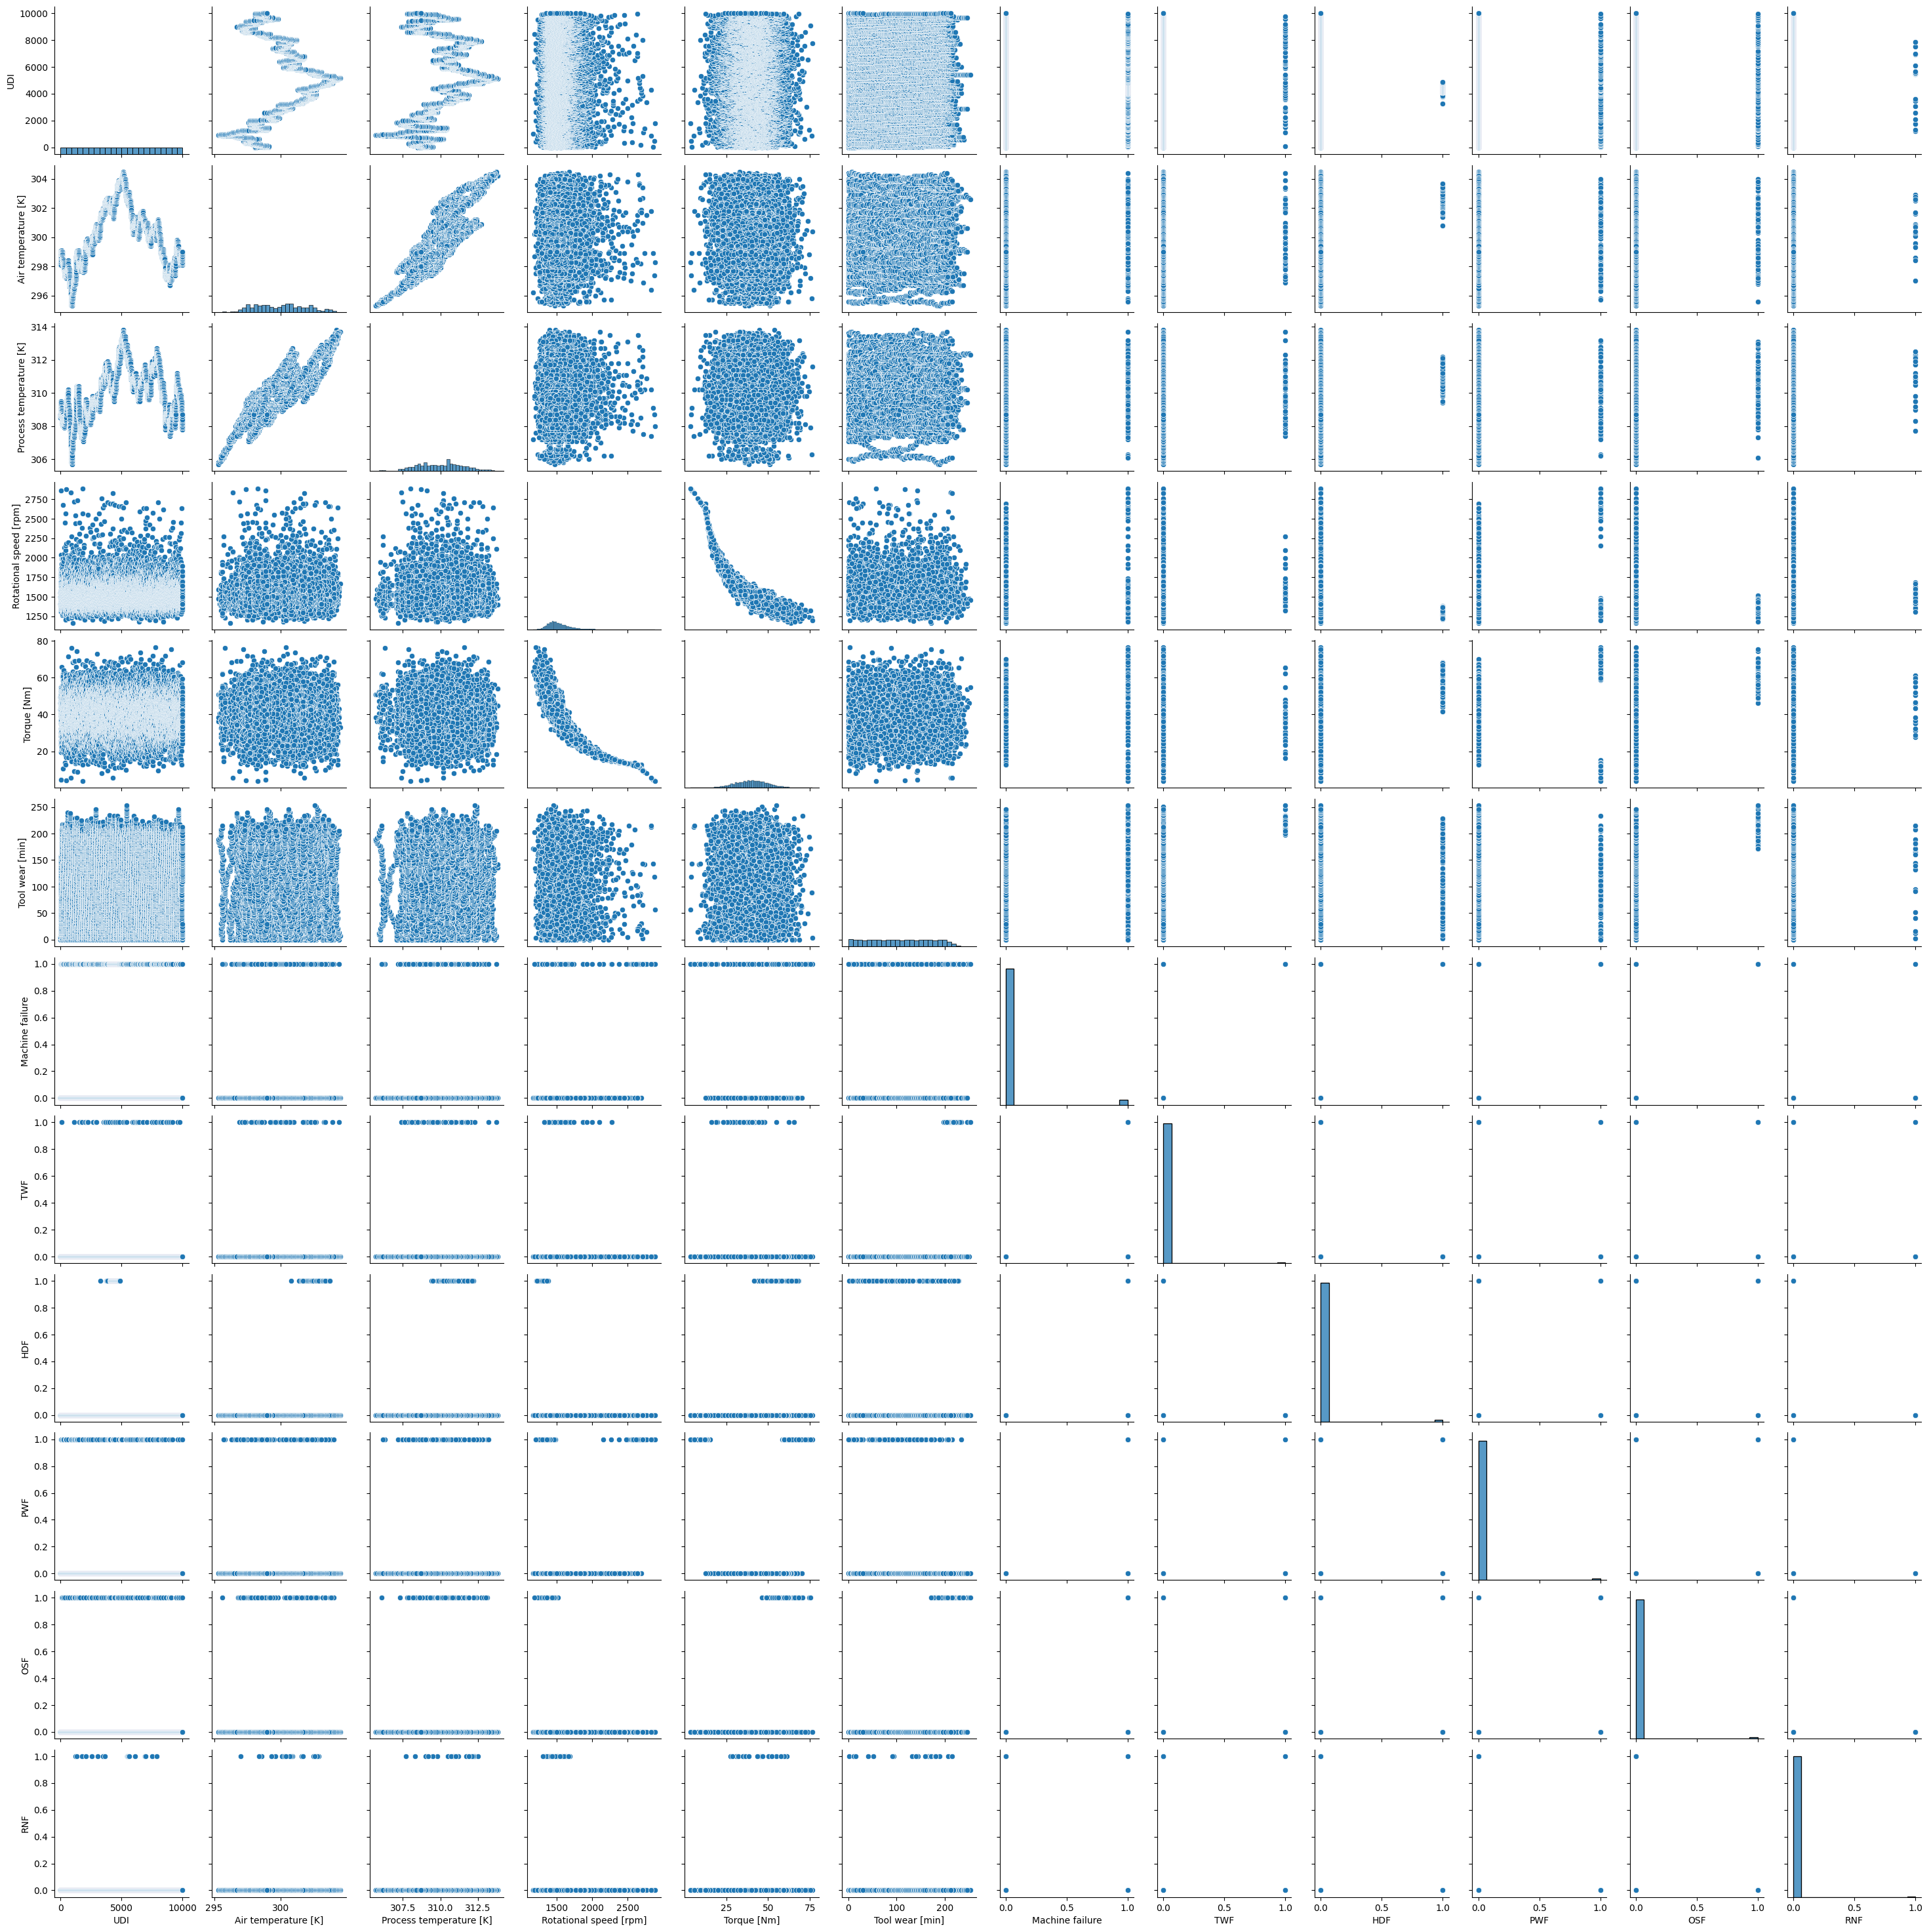

In [110]:
#Correlation
sns.pairplot(data)
plt.show()

## **EXPLORATORY DATA ANALYSIS (EDA)**

The columns used for the Exploratory Data Analysis are:
- Air Temperature [K]
- Process Temperature [K]
- Rotational Speed [rpm]
- Torque [Nm]
- Tool Wear [min]
- Machine Failure

We will visualize trends in sensor readings and identify correlations with equipment failures. This step also includes detecting anomalies that may indicate potential issues.

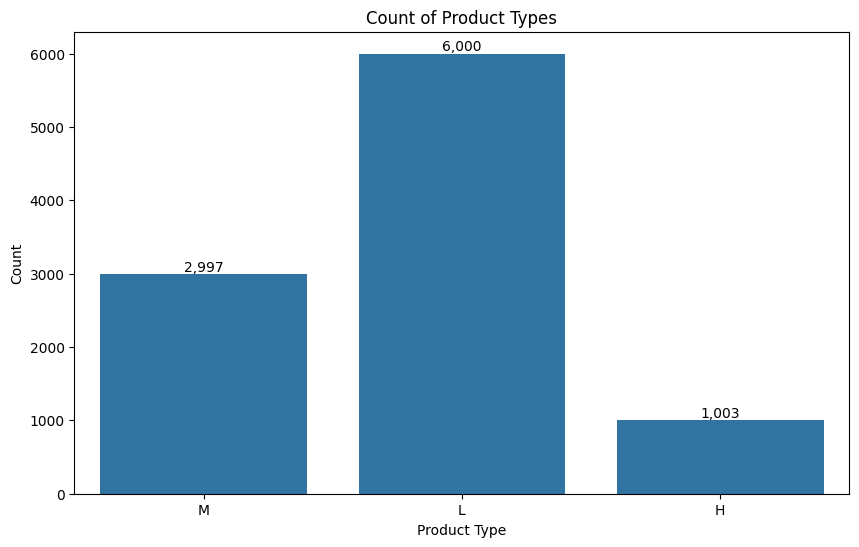

In [12]:
# Count of Product Types:

# Create the count plot
plt.figure(figsize=(10, 6))
count_plot = sns.countplot(x='Type', data=data)

# Add title and labels for the axes
plt.title('Count of Product Types')
plt.xlabel('Product Type')
plt.ylabel('Count')

# Add labels with commas to each bar
for p in count_plot.patches:
    count = p.get_height()
    plt.text(p.get_x() + p.get_width() / 2., count + 0.1,  # position the text at the top of the bar
             f'{int(count):,}',  # format the label with commas
             ha="center", va="bottom", fontsize=10)  # ha for horizontal alignment, va for vertical

plt.show()


### **Count of Product Types Bar Chart Analysis**

The bar graph shows the count of each product type in the dataset:

- **Product Type L** - 6,000 (60% of the total)
- **Product Type M** - 2,997 (30% of the total)
- **Product Type H** - 1,003 (10% of the total)

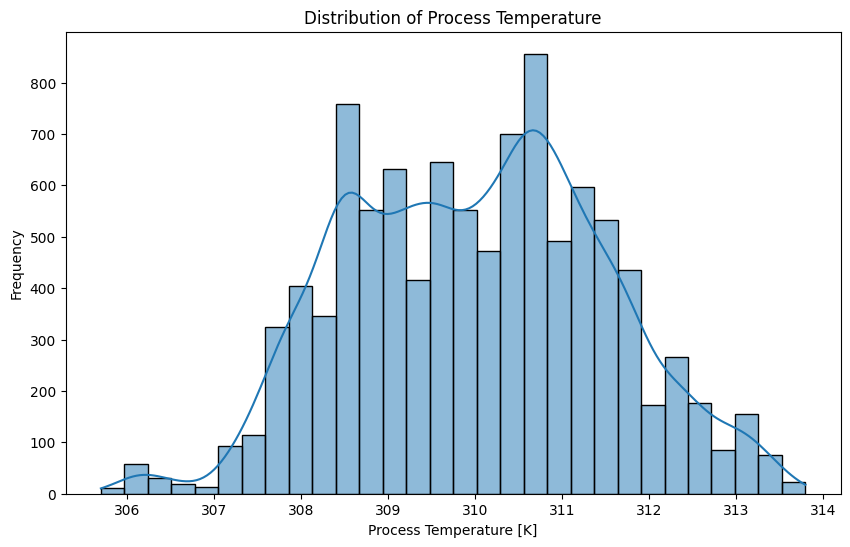

In [13]:
# Distribution of Process Temperature:

plt.figure(figsize=(10, 6))
sns.histplot(data['Process temperature [K]'], kde=True, bins=30)
plt.title('Distribution of Process Temperature')
plt.xlabel('Process Temperature [K]')
plt.ylabel('Frequency')
plt.show()

###**Distribution of Process Temperature Histogram Analysis**

This graph consists of:
- **X-axis (Process Temperature [K])** - This axis represents the range of process temperatures measured in Kelvin (K), spanning from 306 to 314.

- **Y-axis (Frequency)** - This axis indicates the frequency or number of occurrences of each temperature interval, with values ranging up to 800.

The bars in the histogram represent the number of times specific temperature intervals were recorded. The distribution appears to be bell-shaped, suggesting that most temperature values cluster around a central range, with fewer occurrences toward the extremes. This type of distribution is often associated with a normal or Gaussian distribution, indicating that the process temperature tends to be consistent around a central value with natural variability.

This graph is useful for analyzing the stability and consistency of the process’s temperature control.

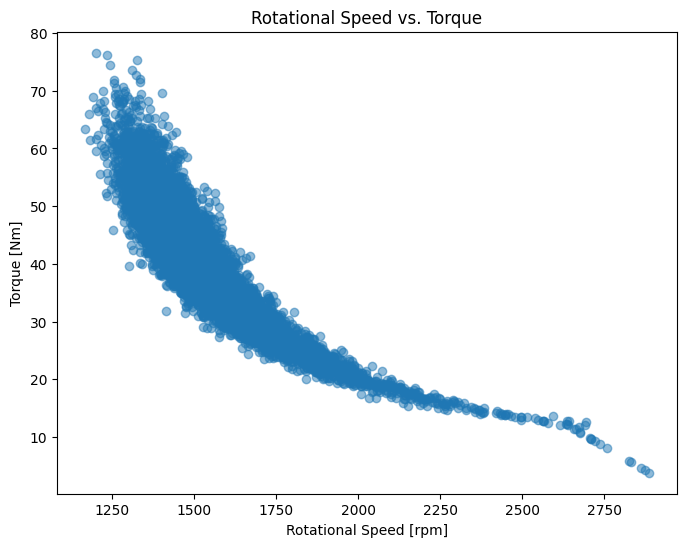

In [14]:
#Scatter Plot of Rotational Speed vs. Torque:

plt.figure(figsize=(8, 6))
plt.scatter(data['Rotational speed [rpm]'], data['Torque [Nm]'], alpha=0.5)
plt.title('Rotational Speed vs. Torque')
plt.xlabel('Rotational Speed [rpm]')
plt.ylabel('Torque [Nm]')
plt.show()

###**Rotational Speed vs. Torque Scatter Plot Analysis**

The graph titled “***Rotational Speed vs. Torque***” shows the relationship between rotational speed (in rpm) and torque (in Nm). Here’s a breakdown of what it represents:

- **Horizontal Axis (X-axis)** -  This axis represents the rotational speed, ranging from approximately 1250 to 2750 rpm.
- **Vertical Axis (Y-axis)** - This axis represents the torque, ranging from 0 to 80 Nm.

The data points on the graph form a downward curving trend, indicating that as the rotational speed increases, the torque decreases. This inverse relationship is common in various mechanical systems, such as motors, where higher speeds often result in lower torque.

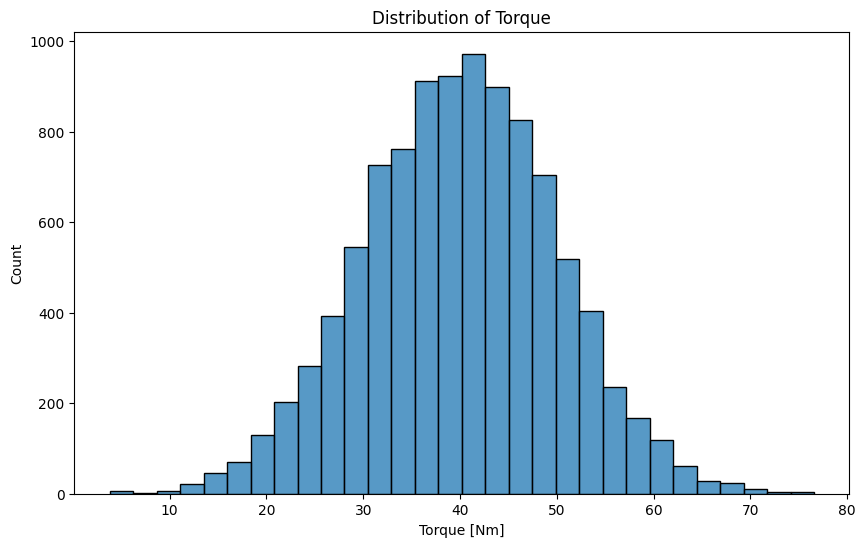

In [15]:
# Distribution of Torque:

plt.figure(figsize=(10, 6))
sns.histplot(data['Torque [Nm]'], bins=30)
plt.title('Distribution of Torque')
plt.show()

### **Distribution of Torque Histogram Analysis**

This graph is a histogram titled “**Distribution of Torque**”.

- **Horizontal Axis (Torque [Nm])** - This axis represents the torque values, ranging from -4 to 4 Newton-meters (Nm).
- **Vertical Axis (Count)**- This axis represents the frequency or count of occurrences for each torque value, ranging from 0 to 1000.

The blue bars form a bell-shaped distribution, indicating that most torque values are centered around zero. This means that the majority of the torque measurements are close to zero, with fewer occurrences as the torque values move towards the extremes (both negative and positive).

This type of distribution is a normal distribution, which is common in many natural and mechanical systems. It suggests that the torque values are symmetrically distributed around the mean (zero in this case).

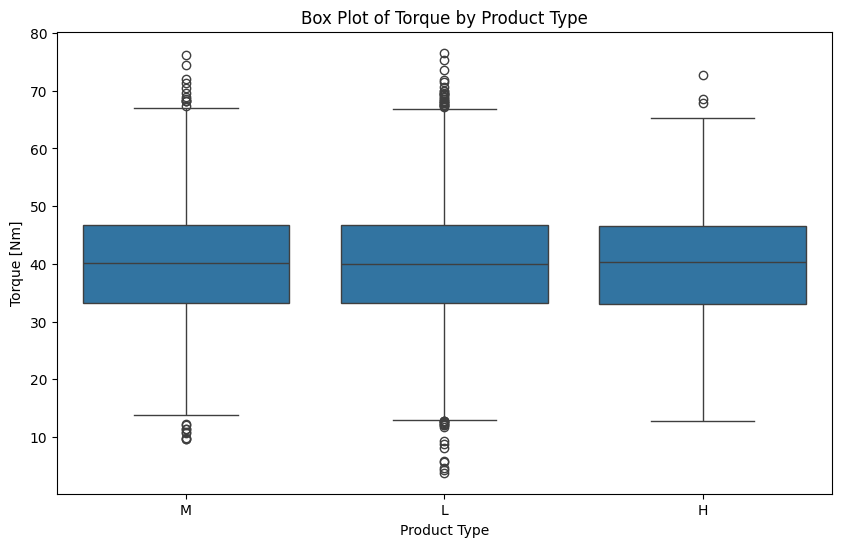

In [16]:
# Box Plot of Torque by Product Type:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Type', y='Torque [Nm]', data=data)
plt.title('Box Plot of Torque by Product Type')
plt.xlabel('Product Type')
plt.ylabel('Torque [Nm]')
plt.show()

###**Torque by Product Type Box Plot Analysis**
The **box plot of torque by product types** is designed to provide a visual comparison of the torque distributions for three different product types labeled ‘M’, ‘L’, and ‘H’.
- **Median Torque Values** - The horizontal line inside each box represents the median torque value for each product type. This helps to identify the central tendency of the torque values for each category.
- **Interquartile Range (IQR)** - The box itself represents the interquartile range, which contains the middle 50% of the data points. This shows the spread of the central half of the data and helps to understand the variability within each product type.
- **Range of Data** - The whiskers extending from the boxes indicate the range of the data, excluding outliers. This provides insight into the overall spread of the torque values for each product type.
- **Outliers** - Individual circles above and below the whiskers represent outliers, which are data points that fall outside the typical range. Identifying outliers can be important for understanding any unusual or extreme values in the data.
- **Comparison Across Product Types** - By comparing the box plots for ‘M’, ‘L’, and ‘H’, one can easily see differences in median values, variability (IQR), and the presence of outliers. This helps to identify which product types have higher or lower torque values and how consistent the torque values are within each category.

Overall, the box plot provides a comprehensive summary of the torque data for each product type, making it easier to compare and analyze the distributions and identify any significant differences or patterns.

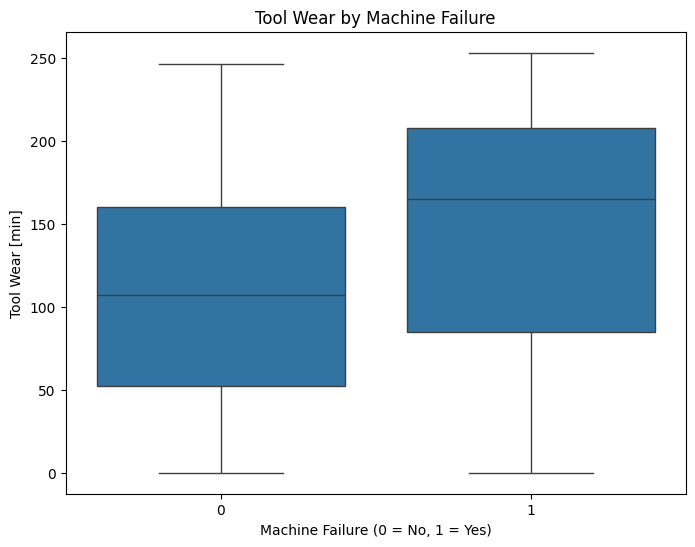

In [17]:
#Box Plot of Tool Wear:

plt.figure(figsize=(8, 6))
sns.boxplot(x='Machine failure', y='Tool wear [min]', data=data)
plt.title('Tool Wear by Machine Failure')
plt.xlabel('Machine Failure (0 = No, 1 = Yes)')
plt.ylabel('Tool Wear [min]')
plt.show()

###**Tool Wear by Machine Failure Box Plot Analysis**

The graph is a box plot titled **"Tool Wear by Machine Failure."** It compares the tool wear time in minutes for instances of machine failure versus no machine failure.

**Explanation of the Graph**
- **X-axis:** Represents machine failure status, with '0' indicating no machine failure and '1' indicating machine failure.
- **Y-axis:** Measures tool wear time in minutes, ranging from 0 to 250 minutes.

**Key Observations**
- **No Machine Failure (0):**
  - Median tool wear time is around 100 minutes.
  - Lower quartile is near 75 minutes.
  - Upper quartile is approximately 125 minutes.
  - No outliers or extreme values.

- **Machine Failure (1):**
  - Median tool wear time is around 200 minutes.
  - Lower quartile is about 175 minutes.
  - Upper quartile is near 225 minutes.
  - No outliers or extreme values.

This graph clearly communicates that **tool wear time tends to be significantly higher when there is a machine failure** compared to when there isn't one. This suggests that increased tool wear could be an indicator or consequence of machine failures. Understanding this relationship is crucial for:
- **Predictive Maintenance** - Identifying potential machine failures before they occur by monitoring tool wear.
- **Performance Optimization** - Improving machinery performance and reducing downtime by addressing excessive tool wear.

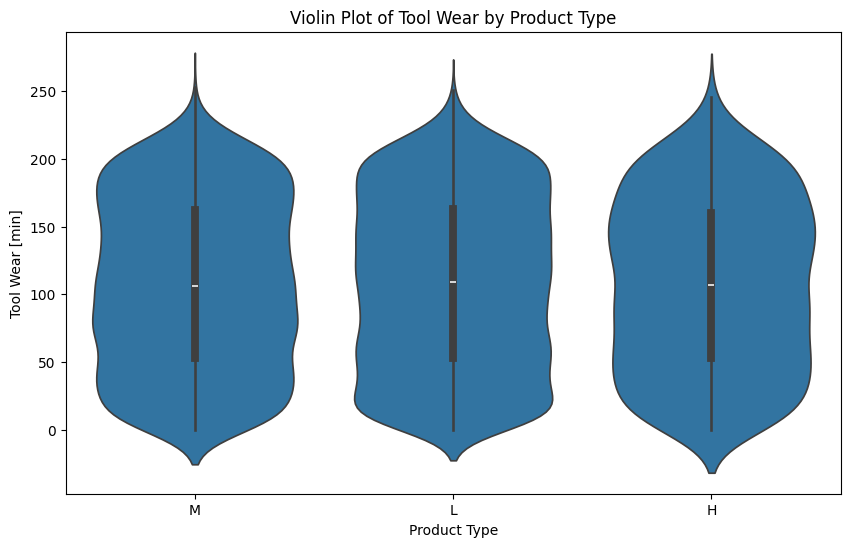

In [18]:
# Violin Plot of Tool Wear by Product Type:

plt.figure(figsize=(10, 6))
sns.violinplot(x='Type', y='Tool wear [min]', data=data)
plt.title('Violin Plot of Tool Wear by Product Type')
plt.xlabel('Product Type')
plt.ylabel('Tool Wear [min]')
plt.show()

### **Violin Plot of Tool Wear by Product Type Analysis**

**Purpose** - The violin plot is used to visualize the distribution and probability density of tool wear data for different product types (M, L, and H).
For example, you can see if one product type tends to have higher or lower tool wear compared to others.

**Components**

1. **Width of the Violin** - Each violin represents a product type (M, L, H). The width of each section indicates the frequency of data points at different levels of tool wear. Wider sections mean more data points at that level.
The width of each section of the violin represents the density of the data points at different levels of tool wear. Wider sections indicate a higher concentration of data points, while narrower sections indicate fewer data points.

2. **Box Plot Inside the Violin** - Inside each violin, there is a box plot showing the median (central mark), quartiles (edges of the box), and variability outside the upper and lower quartiles (lines extending from the box).
   - **Median**: The central mark inside the box plot represents the median value of tool wear for that product type.
   - **Interquartile Range (IQR)**: The edges of the box represent the first quartile (Q1) and the third quartile (Q3). The IQR is the range between Q1 and Q3, showing the middle 50% of the data.
   - **Whiskers**: The lines extending from the box indicate the range of the data outside the upper and lower quartiles. They typically extend to 1.5 times the IQR from Q1 and Q3.
   - **Outliers**: Points outside the whiskers are considered outliers and indicate variability beyond the typical range.

3. **Shape of the Violin**:
   - **Symmetry**: A symmetrical violin indicates that the data is evenly distributed around the median. Asymmetry suggests skewness in the data.
   - **Peaks and Valleys**: Peaks indicate modes or concentrations of data points, while valleys indicate gaps or lower concentrations.

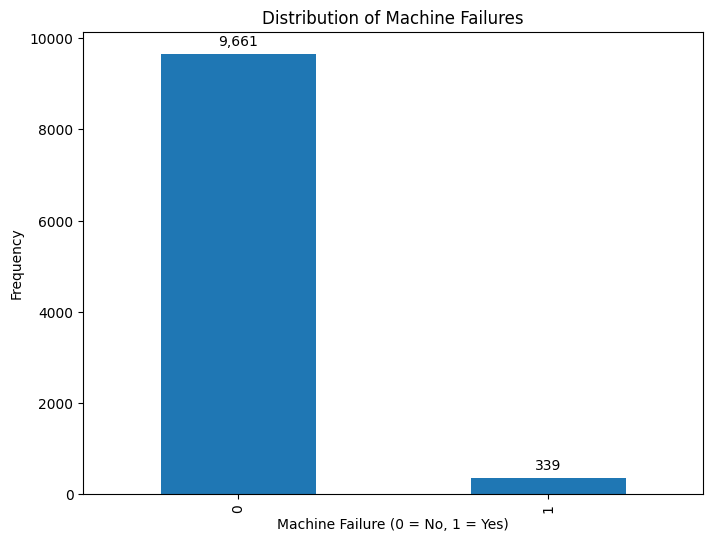

In [19]:
# Histogram of Machine Failures:

# Plot histogram of machine failures
plt.figure(figsize=(8, 6))
ax = data['Machine failure'].value_counts().plot(kind='bar')
plt.title('Distribution of Machine Failures')
plt.xlabel('Machine Failure (0 = No, 1 = Yes)')
plt.ylabel('Frequency')

# Add labels to each bar with commas
for p in ax.patches:
    height = int(p.get_height())
    ax.annotate(f'{height:,}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', xytext=(0, 9), textcoords='offset points')

plt.show()


###**Distribution of Machine Failures Histogram Analysis**

The histogram of machine failures reveals a clear imbalance in the dataset's distribution of failure events. Specifically, there are *9,661 instances where machines did not fail (No)*, compared to only *339 instances where machines did fail (Yes)*. This discrepancy indicates that machine failures are relatively rare events in this dataset, with a significantly higher frequency of non-failure instances. Understanding this imbalance is crucial for data analysis and model training, as it may affect the performance of machine learning algorithms.

For example, models trained on this data might become biased towards predicting the majority class (No), potentially leading to inaccurate predictions for the minority class (Yes). Proper handling of this imbalance, such as using techniques like resampling or adjusting class weights, is essential to ensure that the model can effectively learn from and make accurate predictions about both classes.

This imbalance can lead to biased models that favor the majority class. Two common techniques to handle this issue:

**1. Resampling Techniques**
- **Oversampling the Minority Class** - This involves increasing the number of instances in the minority class (Yes) by replicating existing instances or generating synthetic samples using techniques like SMOTE (Synthetic Minority Over-sampling Technique).
- **Undersampling the Majority Class** - This involves reducing the number of instances in the majority class (No) to balance the dataset. This can be done by randomly removing instances from the majority class.

**2. Adjusting Class Weights**
- **Class Weights Adjustment**- During model training, you can assign higher weights to the minority class (Yes) and lower weights to the majority class (No). This informs the algorithm to pay more attention to correctly predicting instances from the minority class.


This will be handled later in the Feature Engineering process.

Failure rate by machine type:
 Type
H    0.020937
L    0.039167
M    0.027694
Name: Machine failure, dtype: float64


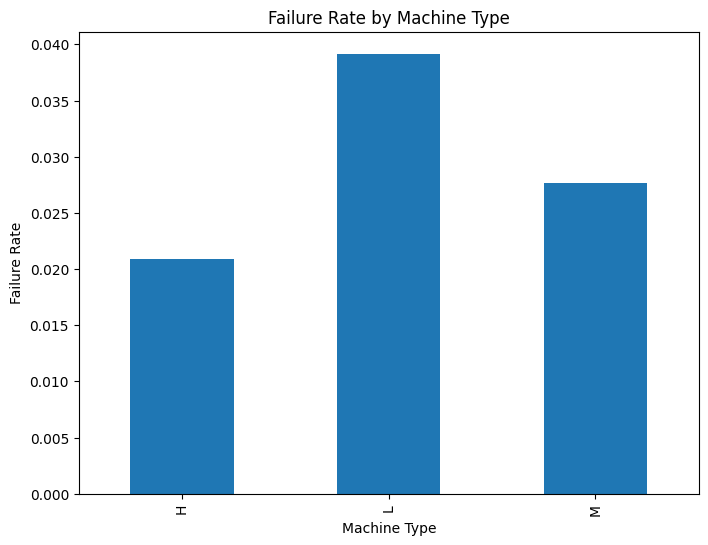

In [20]:
# Failure rate by machine type
failure_rate = data.groupby('Type')['Machine failure'].mean()
print("Failure rate by machine type:\n", failure_rate)

# Bar plot of failure rates by machine type
plt.figure(figsize=(8, 6))
failure_rate.plot(kind='bar')
plt.title('Failure Rate by Machine Type')
plt.xlabel('Machine Type')
plt.ylabel('Failure Rate')
plt.show()

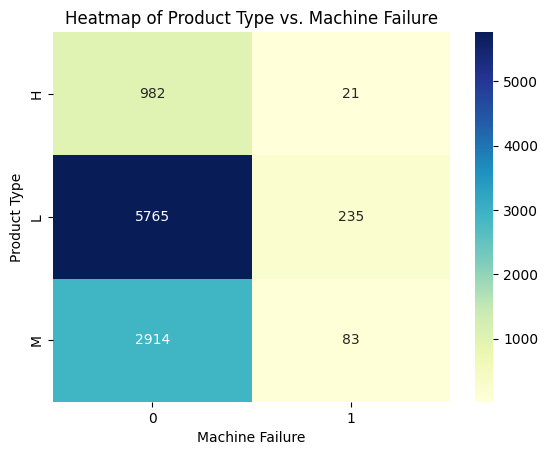

In [21]:
# Heatmap of Product Type vs. Machine Failure
contingency_table = pd.crosstab(data['Type'], data['Machine failure'])
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Heatmap of Product Type vs. Machine Failure')
plt.xlabel('Machine Failure')
plt.ylabel('Product Type')
plt.show()


### **Heatmap of Product Type vs. Machine Failure**
The heatmap visually represents the relationship between different product types and machine failure occurrences.

- **Product Types** - The y-axis lists three product types labeled H, L, and M.
- **Machine Failure** - The x-axis has two categories: 0 (no machine failure) and 1 (machine failure).
The color intensity in each cell indicates the frequency of occurrences, with darker colors representing higher frequencies. The numbers within each cell show the exact count of occurrences for each combination of product type and machine failure status.

**Observations**
- **Product Type H** - High-quality products (H) have the lowest failure rate.
    - No Machine Failure (0) - 982 occurrences
    - Machine Failure (1) - 21 occurrences

- **Product Type M** - Medium quality products (M) have a moderate failure rate.
    - No Machine Failure (0) - 2,914 occurrences
    - Machine Failure (1) - 83 occurrences

- **Product Type L** - Low quality products (L) have the highest failure rate, which aligns with their larger proportion in the dataset.
    - No Machine Failure (0) - 5,765 occurrences
    - Machine Failure (1) - 235 occurrences

**Insights**

The data suggests that higher quality products (H) are more reliable, with fewer machine failures. Lower quality products (L) are less reliable, with a higher number of machine failures.

**Predictive Maintenance**
This heatmap can be used to prioritize maintenance efforts. For instance, more frequent checks and maintenance might be needed for low-quality products (L) to reduce machine failures.

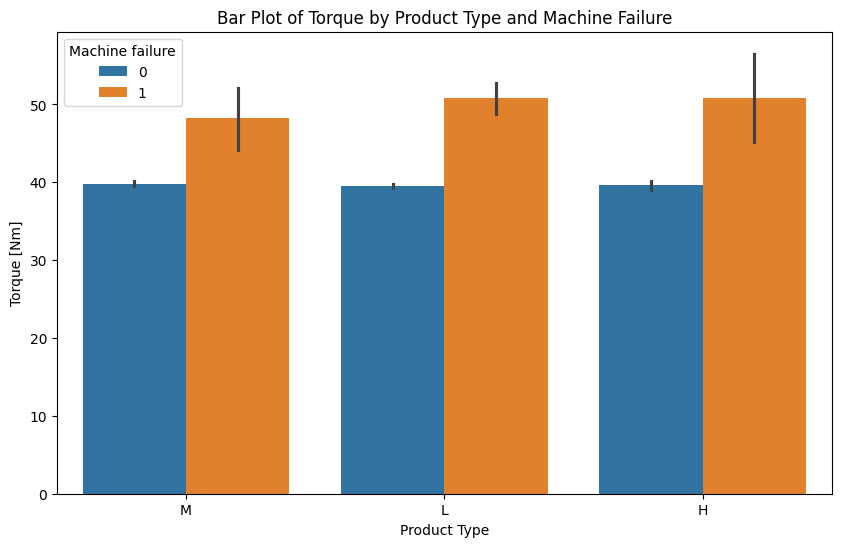

In [22]:
# Bar Plot of Torque by Product Type and Machine Failure

plt.figure(figsize=(10, 6))
sns.barplot(x='Type', y='Torque [Nm]', hue='Machine failure', data=data)
plt.title('Bar Plot of Torque by Product Type and Machine Failure')
plt.xlabel('Product Type')
plt.ylabel('Torque [Nm]')
plt.show()

### **Torque by Product Type and Machine Failure Analysis**

The graph shows a comparison between the torque values for each product type (quality) when there is no machine failure versus when there is a machine failure.

Generally, torque values tend to be higher when there is a machine failure, indicating that machine reliability significantly affects the performance of the products.

This helps in understanding how different quality products perform under varying conditions of machine reliability.

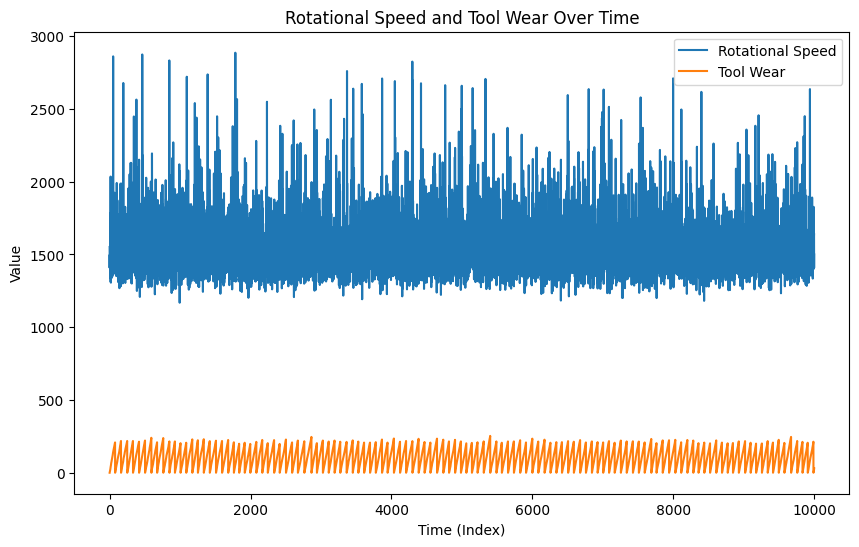

In [23]:
#Time-Based Analysis:

# Assuming there is a timestamp or sequential index for time-based analysis
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Rotational speed [rpm]'], label='Rotational Speed')
plt.plot(data.index, data['Tool wear [min]'], label='Tool Wear')
plt.title('Rotational Speed and Tool Wear Over Time')
plt.xlabel('Time (Index)')
plt.ylabel('Value')
plt.legend()
plt.show()

### **Rotational Speed and Tool Wear Over Time Analysis**

The graph illustrates the relationship between rotational speed and tool wear over time. The blue line represents rotational speed, which exhibits significant variability and numerous spikes throughout the time index. This high variability is expected, as rotational speed can fluctuate greatly during machine operation due to changes in load, speed adjustments, and other operational factors.

On the other hand, the orange line represents tool wear, which shows a much smoother and consistently low pattern. This indicates that tool wear increases at a slower and more gradual rate compared to the rapid changes in rotational speed. The gradual increase in tool wear is typical, as tools degrade over time with usage, but the rate of wear is generally more stable and less influenced by short-term fluctuations.

## **FEATURE ENGINEERING**

Feature engineering is the process of transforming raw data into meaningful features that better represent the underlying problem to the predictive models, resulting in improved model performance. The nature of feature engineering includes creating, modifying, or selecting features that enhance a model's ability to make accurate predictions.

Some of the feature engineering key aspects are the following:

1. Handling Missing Values

2. Encoding Categorical Variables

3. Scaling and Normalization

4. Feature Creation

5. Dimensionality Reduction

6. Others

### **Handling Null Values**

One of the most common problems in data is missing values. Effective handling of missing data ensures that the dataset retains its integrity and does not introduce bias or errors into the model.

Imputation: Missing values can be replaced with meaningful values like the mean, median, or mode. This helps the model avoid issues with incomplete data.
Flagging: A new binary feature can be created to flag whether a value is missing. This may add valuable information to the model, as missingness itself could be predictive.

This step was thoroughly reviewed in the Data Preprocessing section, where we confirmed that the dataset contains no null values.

### **Encoding Categorical Variables**

Many machine learning models cannot work directly with categorical variables, so they must be encoded as numeric values. Different encoding techniques can represent categorical data more efficiently.

- **Label Encoding** - Each unique category is assigned a distinct integer value. This is useful for ordinal categories.

- **One-Hot Encoding** - This method converts categorical variables into binary columns. Each category gets its own column with 1s and 0s indicating the presence or absence of the category.

- **Target Encoding** - Categories are replaced with a summary statistic (e.g., the mean of the target variable for that category), which can capture patterns between the category and the target variable.

In [24]:
#Display the first 5 records of the Dataframe
data.head(5)

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


The following code performs data type conversion and encoding on a column in a DataFrame named data.

**Purpose:** The code transforms categorical data into a numerical format suitable for machine learning algorithms.

**Steps:**

*   **Check Data Types** - data.dtypes provides the data types of all columns.
*   **Convert to Categorical** - astype('category') changes the Type column to a categorical type.
*   **Encode Categories** - *.cat.codes* converts the categorical values into numeric codes.

This process is a common preprocessing step in data analysis and machine learning to prepare categorical data for further analysis or modeling.

In [25]:

data.dtypes
data['Type'] = data['Type'].astype('category')
data['Type'] = data['Type'].cat.codes

data.head(5)

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,2,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,1,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,1,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,1,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,1,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


Product types L, M, and H represent product quality categories for Low, Medium, and High, respectively. After encoding, the product types were classified as follows:

- Product type 'L' (Low) - is encoded as 1
- Product type 'M' (Medium) - is encoded as 2
- Product type 'H' (High) - is encoded as 3

### Handling Class Imbalance:

As seen in the previously, the histogram of **machine failures** reveals a clear imbalance in the dataset, with ***9,661 instances where machines did not fail (labeled as "No") and only 339 instances where machines did fail (labeled as "Yes")***. This stark imbalance—where failure events are rare—poses a significant challenge for machine learning models.

#### Why is this imbalance important?

In datasets like this, where one class (non-failures) dominates the other, machine learning models tend to favor the majority class during training. This can result in a biased model that predicts "No" (non-failure) for most cases, while failing to accurately identify the minority class ("Yes", or failure). This bias leads to poor performance in detecting the rare, yet crucial, failure events.


In [26]:
#Class Imbalance Handling:


# Check for class imbalance
class_counts = data['Machine failure'].value_counts()
print("Class distribution:\n", class_counts)

# Separate features (X) and target (y)
X = data.drop('Machine failure', axis=1)
y = data['Machine failure']

# Identify categorical columns (if any)
categorical_columns = X.select_dtypes(include=['object']).columns

# Apply Label Encoding to categorical columns (you can also use OneHotEncoder if needed)
label_encoder = LabelEncoder()
for col in categorical_columns:
    X[col] = label_encoder.fit_transform(X[col])

# Resample using SMOTE
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

# Check the resampled class distribution
print("Resampled class distribution:\n", pd.Series(y_res).value_counts())


Class distribution:
 Machine failure
0    9661
1     339
Name: count, dtype: int64
Resampled class distribution:
 Machine failure
0    9661
1    9661
Name: count, dtype: int64


### Handling the Class Imbalance: Code Explanation

The code provided addresses this class imbalance by applying **SMOTE (Synthetic Minority Over-sampling Technique)**, which is one of the most common methods for dealing with imbalanced datasets. The key steps in the code are as follows:

1. **Checking for Class Imbalance:**
   ```python
   class_counts = data['Machine failure'].value_counts()
   print("Class distribution:\n", class_counts)
   ```
   This step analyzes the distribution of the `Machine failure` column, confirming that the dataset is heavily imbalanced. Understanding this distribution is crucial because an imbalanced dataset could skew model performance toward the majority class (No failures).

2. **Splitting Features and Target:**
   ```python
   X = data.drop('Machine failure', axis=1)
   y = data['Machine failure']
   ```
   Here, the features (`X`) are separated from the target variable (`y`), allowing for proper preprocessing and model training.

3. **Handling Categorical Variables:**
   ```python
   label_encoder = LabelEncoder()
   for col in categorical_columns:
       X[col] = label_encoder.fit_transform(X[col])
   ```
   This step encodes any categorical data (such as product IDs or machine types) into numerical values so that algorithms like SMOTE can process them. Categorical variables must be converted to numerical form before applying machine learning techniques.

4. **Resampling with SMOTE:**
   ```python
   smote = SMOTE(random_state=42)
   X_res, y_res = smote.fit_resample(X, y)
   ```
   **SMOTE** is applied here to oversample the minority class ("Yes" for machine failure). Rather than simply replicating the few existing instances of failure, SMOTE generates synthetic examples by creating new instances that resemble real failure events. This helps balance the dataset without losing the diversity of the minority class.

5. **Verifying the Resampled Distribution:**
   ```python
   print("Resampled class distribution:\n", pd.Series(y_res).value_counts())
   ```
   After resampling, the class distribution is checked again to ensure that the dataset is balanced. This step ensures that both "Yes" (failure) and "No" (non-failure) instances are now evenly represented, which helps improve the model's ability to predict failures accurately.

#### Importance of Handling Class Imbalance

By addressing the class imbalance with SMOTE, the model is trained on a more balanced dataset. Without this step, the model would likely learn to predict "No" most of the time due to the overwhelming number of non-failure examples. This would lead to high accuracy on the majority class, but poor performance on the minority class (failure), which is often the more critical prediction in real-world applications.

In summary, **class imbalance** can lead to biased models that overlook rare, yet important events like machine failures. Techniques like **SMOTE** (oversampling) or **adjusting class weights** during training help to ensure the model learns to identify both classes effectively, improving its overall performance and usefulness.

### **Scaling and Normalization**

In [27]:
# Scaling columns
scaler = StandardScaler()
data[['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']] = scaler.fit_transform(data[['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']])

The code above standardizes specific columns in a DataFrame to prepare the data for machine learning analysis.

The process begins by importing the *StandardScaler* class from the sklearn.preprocessing module, which is essential for scaling features.

An instance of StandardScaler is created to handle the transformation. The core of the code involves selecting five columns from the DataFrame, which include various measurements such as ***air temperature, process temperature, rotational speed, torque, and tool wear***.

Using the *fit_transform() method*, the code calculates the mean and standard deviation for each of these columns and then applies the transformation. This process adjusts each column’s data to have a mean of 0 and a standard deviation of 1. By doing so, the code ensures that the features are on a similar scale, which is crucial for many machine learning algorithms that rely on distance metrics or gradient-based optimization methods.

Standardizing the data helps improve the convergence rate and performance of models, making it easier to train and more effective in capturing patterns in the dataset.

In [28]:
# Drop unnecessary columns
data = data.drop(['TWF', 'HDF', 'PWF', 'OSF', 'RNF'], axis=1)

In [29]:
data

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure
0,1,M14860,2,-0.952389,-0.947360,0.068185,0.282200,-1.695984,0
1,2,L47181,1,-0.902393,-0.879959,-0.729472,0.633308,-1.648852,0
2,3,L47182,1,-0.952389,-1.014761,-0.227450,0.944290,-1.617430,0
3,4,L47183,1,-0.902393,-0.947360,-0.590021,-0.048845,-1.586009,0
4,5,L47184,1,-0.902393,-0.879959,-0.729472,0.001313,-1.554588,0
...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,2,-0.602417,-1.082162,0.363820,-1.052012,-1.476034,0
9996,9997,H39410,0,-0.552421,-1.082162,0.520005,-0.821283,-1.428902,0
9997,9998,M24857,2,-0.502425,-0.947360,0.592519,-0.660777,-1.350349,0
9998,9999,H39412,0,-0.502425,-0.879959,-0.729472,0.854005,-1.303217,0


### **Feature Creation**

In [30]:
#Machine Failure Prediction (Binary Classification):


# Feature selection
X = data[['Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']]
y = data['Machine failure']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Random Forest model
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [31]:
# Predictions and evaluation
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9803333333333333
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2907
           1       0.85      0.44      0.58        93

    accuracy                           0.98      3000
   macro avg       0.92      0.72      0.79      3000
weighted avg       0.98      0.98      0.98      3000



#### **Analysis**

The results as shown above, reflect the performance of a classification model in terms of accuracy, precision, recall, and F1-score for two classes: 0 (the majority class) and 1 (the minority class).

**Accuracy**

The overall accuracy of the model is **98.03%**, meaning that 98% of the total predictions made by the model were correct. While this is a high accuracy, it is important to consider that this dataset is imbalanced, with significantly more instances of class **0 (2,907)** than class **1 (93)**.

**Precision, Recall, and F1-Score**
 - **Class 0**
    - The model performs exceptionally well in predicting class 0 (non-failures, assuming this is the majority class). It has a precision of 0.98, meaning that 98% of the instances predicted as class 0 were correct.

    - The recall is 1.00, meaning the model successfully identified all instances of class 0.

    - The F1-score, which is the harmonic mean of precision and recall, is 0.99, reflecting the strong performance for this class.

 - **Class 1**
    - For class 1 (failures, the minority class), the model performs less effectively. The precision is 0.85, indicating that 85% of the instances predicted as class 1 were correct.

    - However, the recall is 0.44, meaning the model only correctly identified 44% of the actual class 1 instances.

    - The F1-score for class 1 is 0.58, showing that the model struggles with this class, likely due to the class imbalance.

**Macro Average vs Weighted Average**

 - **Macro Average** - The macro average gives equal weight to both classes. Here, the macro-averaged precision is 0.92, recall is 0.72, and the F1-score is 0.79. These lower values reflect the model's weaker performance in predicting the minority class.

 - **Weighted Average** - The weighted average accounts for the imbalance between the two classes by assigning more weight to the majority class. The weighted averages for precision, recall, and F1-score are all around 0.98, showing that the high performance for class 0 heavily influences the overall evaluation metrics.

**Summary**

The model performs very well for class 0, achieving near-perfect accuracy. However, its performance on class 1 is significantly weaker, particularly in terms of recall, where it only correctly identifies 44% of the actual instances. This discrepancy is likely due to the imbalanced dataset, where class 0 dominates, leading the model to prioritize the majority class. While the overall accuracy is high, this may not fully reflect the model's ability to correctly classify the minority class. To address this, techniques such as resampling or adjusting class weights may be necessary to improve performance on the minority class.

In [35]:
# New analysis with balanced dataset using SMOTE
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

# Initialize the Stratified K-Fold cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Lists to store metrics for each fold
auc_scores = []
classification_reports = []

# Perform Stratified K-Fold Cross-Validation
for train_index, test_index in skf.split(X_res, y_res):
    # Use iloc to index rows by position in Pandas DataFrame
    X_train, X_test = X_res.iloc[train_index], X_res.iloc[test_index]
    y_train, y_test = y_res.iloc[train_index], y_res.iloc[test_index]

    # Initialize and train a Random Forest Classifier
    rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
    rf_model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = rf_model.predict(X_test)
    y_pred_proba = rf_model.predict_proba(X_test)[:, 1]  # Probability estimates for ROC AUC

    # Calculate AUC-ROC score for the current fold
    auc_score = roc_auc_score(y_test, y_pred_proba)
    auc_scores.append(auc_score)

    # Generate classification report and store it
    report = classification_report(y_test, y_pred, output_dict=True)
    classification_reports.append(report)

    # Print classification report for the current fold
    print(f"Fold Classification Report:\n{classification_report(y_test, y_pred)}")
    print(f"AUC-ROC Score for Fold: {auc_score:.4f}")

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Calculate average AUC-ROC score across all folds
average_auc = np.mean(auc_scores)
print(f"\nAverage AUC-ROC Score across all folds: {average_auc:.4f}")



Fold Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.94      0.96      1933
           1       0.94      0.99      0.96      1932

    accuracy                           0.96      3865
   macro avg       0.96      0.96      0.96      3865
weighted avg       0.96      0.96      0.96      3865

AUC-ROC Score for Fold: 0.9942
Fold Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.94      0.96      1932
           1       0.94      0.98      0.96      1933

    accuracy                           0.96      3865
   macro avg       0.96      0.96      0.96      3865
weighted avg       0.96      0.96      0.96      3865

AUC-ROC Score for Fold: 0.9935
Fold Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.94      0.96      1932
           1       0.95      0.98      0.96      1932

    accuracy                        

#### **Analysis**

The code provided performs **Stratified K-Fold Cross-Validation** on a dataset that has been balanced using **SMOTE** (*Synthetic Minority Over-sampling Technique*).

**Code Functionality**
- **SMOTE Resampling** **bold text** - The dataset's target variable, y_res, was imbalanced, meaning one class had significantly fewer examples than the other. SMOTE generates synthetic data for the minority class, making both classes equally represented in the training data.

- **Stratified K-Fold Cross-Validation** - The resampled data is split into 5 different folds using Stratified K-Fold, ensuring that the class distribution in each fold is similar. In each iteration, the model is trained on 4 of the folds and tested on the remaining fold, and this process repeats for all 5 folds.

- **Random Forest Model Training** - A Random Forest Classifier is trained on the training data in each fold. The classifier is initialized with **class_weight='balanced'** to further help the model pay attention to both classes, even after SMOTE.

- **Evaluation** - For each fold, predictions are made on the test set.
Performance metrics, including precision, recall, F1-score, and AUC-ROC score, are calculated for each fold.
The AUC-ROC score is particularly important in binary classification problems, as it measures the model's ability to distinguish between the two classes across different decision thresholds.

- **Results** - The performance metrics for each fold are printed, along with the overall average AUC-ROC score across all 5 folds, which gives an indication of how well the model generalizes.

**Interpretation of Results**

The classification reports and AUC-ROC scores for each fold show that the model performs consistently well across all folds:

- **Precision, Recall, and F1-Score** - For both classes (class 0 and class 1), the precision, recall, and F1-score are all around 0.96. This indicates that the model predicts both classes with high accuracy.

    - **Precision** - The precision for class 1 (the minority class after SMOTE) is about 0.94-0.95. This means that around 94-95% of the instances predicted as class 1 are correct.
    - **Recall** - The recall for class 1 is about 0.98-0.99, meaning the model successfully identifies nearly all the actual instances of class 1 (machine failures).
    - **F1-Score** - The F1-score, which is the harmonic mean of precision and recall, is high for both classes (around 0.96), indicating a good balance between precision and recall.

- **Accuracy** - The overall accuracy for each fold is 0.96, meaning that 96% of the predictions made by the model are correct.
While accuracy is high, it is important to look at precision and recall for both classes to ensure that the model is not biased toward one class.

- **AUC-ROC Score** - The AUC-ROC scores for each fold are between 0.9930 and 0.9942, with an average score of 0.9936. A perfect AUC-ROC score is 1.0, and scores above 0.99 indicate excellent model performance. This means the model can almost perfectly distinguish between class 0 (non-failure) and class 1 (failure) across all decision thresholds.

- **Macro Average and Weighted Average** -The macro average (averaging precision, recall, and F1-score across both classes) and the weighted average (accounting for class imbalance in the averages) are both consistently around 0.96. This confirms that the model performs well for both classes, even though there was originally class imbalance in the data.

- **Confusion Matrix** - The confusion matrix provides a detailed breakdown of the model’s performance:
    - **True Positives (TP)** - The number of positive instances correctly classified by the model (1,886).
    - **True Negatives (TN)** - The number of negative instances correctly classified by the model (1,819).
    - **False Positives (FP)** - The number of negative instances incorrectly classified as positive (113).
    - **False Negatives (FN)** - The number of positive instances incorrectly classified as negative (46).

**Summary**

The model performs exceptionally well across all folds, with balanced performance between the two classes (0 and 1). The use of SMOTE and the Random Forest classifier with balanced class weights ensures that the model can effectively identify both machine failures (minority class) and non-failures. The high AUC-ROC score indicates that the model is very good at distinguishing between the two classes, making it well-suited for this imbalanced classification task.

This confusion matrix shows that the model performs very well overall, with high precision and recall. It correctly identifies the majority of both positive and negative cases, though it makes a few errors (113 false positives and 46 false negatives). These metrics suggest that the model is effective at predicting both classes, particularly the minority class, which may have been the original focus of improvement through techniques like SMOTE.

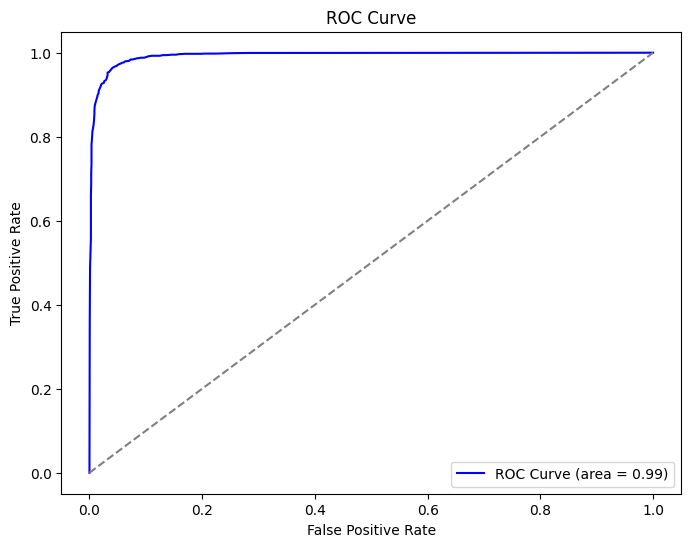

In [38]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Calculate FPR, TPR, and thresholds for ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate AUC score
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


#### **ROC Curve Analysis**

The ROC Curve, or Receiver Operating Characteristic Curve, is a graphical representation used to evaluate the performance of a binary classification model. It plots the True Positive Rate (TPR) against the False Positive Rate (FPR) at various threshold settings. The True Positive Rate, also known as sensitivity or recall, measures the proportion of actual positives that are correctly identified by the model. On the other hand, the False Positive Rate measures the proportion of actual negatives that are incorrectly identified as positives.

In the ROC Curve as shown above, the curve starts at the origin (0,0), rises sharply towards the top-left corner, and then flattens out as it approaches the y-axis value of 1.0. This indicates that the model has a high True Positive Rate for low False Positive Rates, which is a desirable characteristic. The area under the ROC Curve (AUC) is a single scalar value that summarizes the overall performance of the model. An AUC value of 0.99, as shown in the graph, indicates excellent model performance, meaning the model is very effective at distinguishing between the two classes.

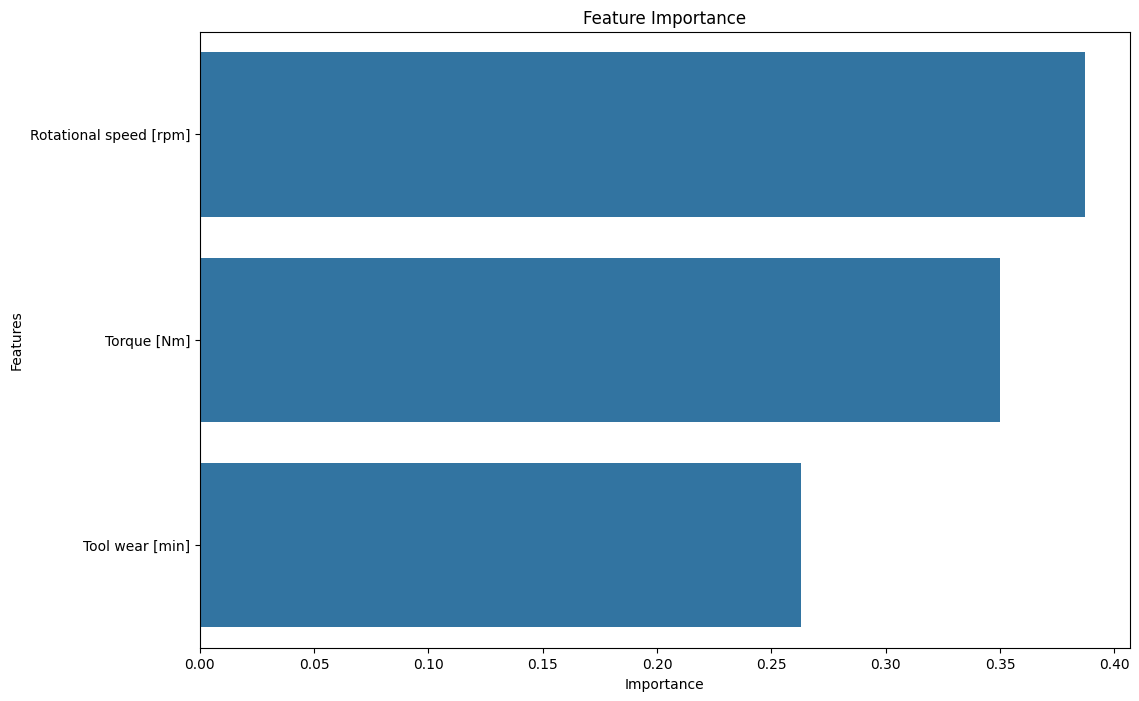

In [39]:
# Get feature importances from the trained model
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]  # Sort feature importances in descending order
features = X.columns.to_numpy()  # Convert features to a numpy array for indexing

# Plot the feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x=importances[indices], y=features[indices])
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

#### **Feature Importance Chart Analyis**
The chart **Feature Importance** visualizes the importance of different features as determined by a random forest trained model. The *Rotational speed [rpm]* has the highest importance score, making it the most influential feature in the model. *Torque [Nm]* is the second most important feature, and *Tool wear [min]* has the lowest importance score among the three features.

Understanding feature importance is crucial in feature engineering as it helps you identify which features contribute the most to the model’s predictions. This suggests that *Rotational speed [rpm]* has the most significant impact on the model’s predictions. In a manufacturing context, this might indicate that rotational speed is a critical factor in predicting machine performance or failure.

By understanding and interpreting feature importances, you can make more informed decisions about your model and data, leading to better performance and more actionable insights.

### **Dimensional Reduction**

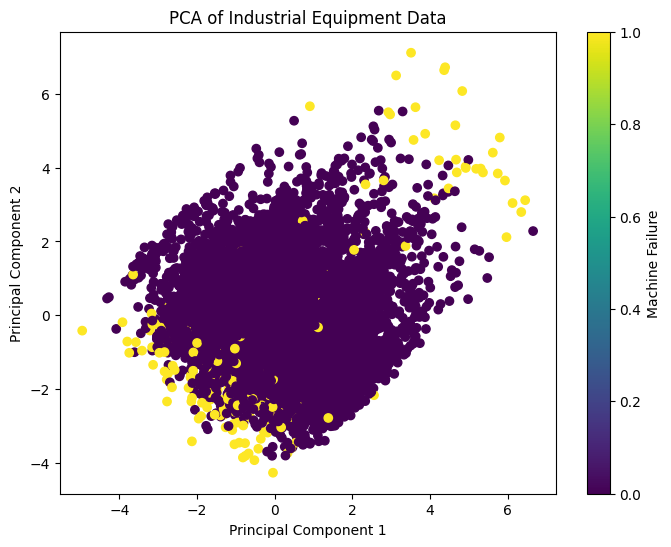

Explained variance ratio: [0.3821481  0.36817048]


In [40]:
# Principal Component Analysis (PCA) of Industrial Equipment Data

numeric_features = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]',
                    'Torque [Nm]', 'Tool wear [min]']

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[numeric_features])

pca = PCA(n_components=2)
principal_components = pca.fit_transform(data_scaled)

pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

pca_df['Machine failure'] = data['Machine failure']

plt.figure(figsize=(8,6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['Machine failure'], cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Industrial Equipment Data')
plt.colorbar(label='Machine Failure')
plt.show()

print('Explained variance ratio:', pca.explained_variance_ratio_)

### **PCA Interpretation**
The PCA reduces the multidimensional data into two dimensions while preserving as much variance as possible. This visualization helps to identify patterns or groupings in the data that might be associated with machine failure. For example, clusters of points with similar colors might indicate similar machine failure statuses.

In [45]:
# Neural Network Model for Machine Failure Prediction
features = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]',
            'Torque [Nm]', 'Tool wear [min]']
target = 'Machine failure'

X = data[features]
y = data[target]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

model = Sequential()

model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))

model.add(Dense(64, activation='relu'))

model.add(Dense(32, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test))

test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8337 - loss: 0.3573 - val_accuracy: 0.9690 - val_loss: 0.1181
Epoch 2/30
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9657 - loss: 0.1101 - val_accuracy: 0.9733 - val_loss: 0.0977
Epoch 3/30
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9707 - loss: 0.0886 - val_accuracy: 0.9710 - val_loss: 0.0909
Epoch 4/30
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9672 - loss: 0.0963 - val_accuracy: 0.9757 - val_loss: 0.0762
Epoch 5/30
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9746 - loss: 0.0722 - val_accuracy: 0.9770 - val_loss: 0.0701
Epoch 6/30
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9737 - loss: 0.0720 - val_accuracy: 0.9773 - val_loss: 0.0658
Epoch 7/30
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9765 - loss: 0.0608 - val_accuracy: 0.9803 - val_loss: 0.0602
Epoch 8/30
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9773 - loss: 0.0647 - val_accuracy: 0.9783 - val_

#### **Analysis**
The purpose of this code is to build and train a neural network model to predict machine failure based on various input features such as air temperature, process temperature, rotational speed, torque, and tool wear. By doing so, it aims to:

- **Identify patterns** - Learn from historical data to identify patterns and relationships between the input features and machine failure.

- **Predict failures** - Use the trained model to predict whether a machine will fail, which can help in preventive maintenance and reducing downtime.

- **Improve decision-making** - Provide insights that can help in making informed decisions about machine maintenance and operations.

- **Enhance efficiency** - By predicting failures, it can help in scheduling maintenance more effectively, thus improving overall operational efficiency.

This kind of predictive maintenance can be crucial in industries where machine downtime can lead to significant losses.

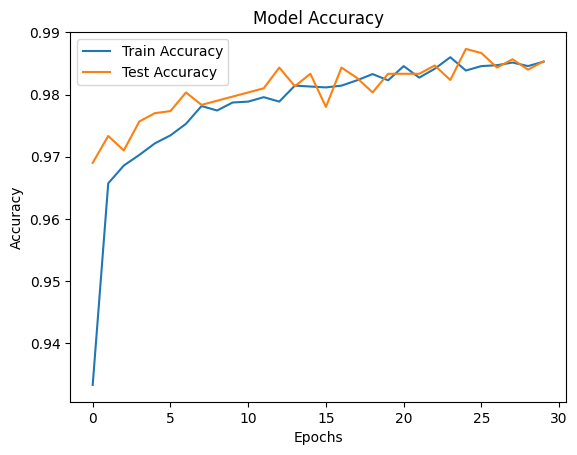

In [47]:
# Model Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#### **Model Accuracy Analysis**

This graph titled “**Model Accuracy**” shows how the accuracy of the neural network model changes over the training epochs. Here’s a detailed explanation:

- **X-axis (Epochs)** - Represents the number of training epochs, ranging from 0 to 30. An epoch is one complete pass through the entire training dataset.

- **Y-axis (Accuracy)** - Represents the accuracy of the model, ranging from 0.960 to 0.985. Accuracy is a measure of how well the model’s predictions match the actual outcomes.

- **Blue Line (Train Accuracy)** - Shows the accuracy of the model on the training data. It starts lower and increases as the number of epochs increases, indicating that the model is learning from the training data.

- **Orange Line (Test Accuracy)** - Shows the accuracy of the model on the test data. It also increases over the epochs, indicating that the model is generalizing well to new, unseen data.

- **Trend** - Both lines show an upward trend, meaning that the model’s accuracy improves with more training epochs. The close proximity of the two lines suggests that the model is not overfitting, as both training and test accuracies are increasing together.

Overall, this graph indicates that the model is learning effectively and improving its performance over time.

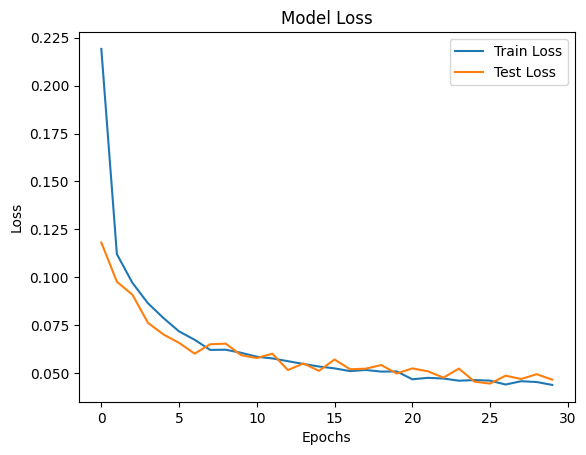

In [48]:
# Model Loss

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#### **Model Loss Analysis**
This chart titled “**Model Loss**” shows how the loss of the neural network model changes over the training epochs. Here’s a detailed explanation:

- **X-axis (Epochs)** - Represents the number of training epochs, ranging from 0 to 30. An epoch is one complete pass through the entire training dataset.

- **Y-axis (Loss)** - Represents the loss of the model, ranging from 0.050 to 0.225. Loss is a measure of how well the model’s predictions match the actual outcomes, with lower values indicating better performance.

- **Blue Line (Train Loss)** - Shows the loss of the model on the training data. It starts higher and decreases sharply within the first few epochs, then continues to decrease more gradually, leveling off around 0.025. This indicates that the model is learning and improving its performance on the training data.

- **Orange Line (Test Loss)** - Shows the loss of the model on the test data. It follows a similar pattern to the train loss, starting slightly higher and decreasing sharply at first, then leveling off close to where the train loss does. This indicates that the model is also improving its performance on the test data.

- **Trend** - Both lines show a downward trend, meaning that the model’s loss decreases with more training epochs. The close proximity of the two lines suggests that the model is not overfitting, as both training and test losses are decreasing together.

Overall, this chart indicates that the model is learning effectively and reducing its error over time.

Linear Regression MSE: 1.055039911963184
Linear Regression R^2: -0.001198736041068127


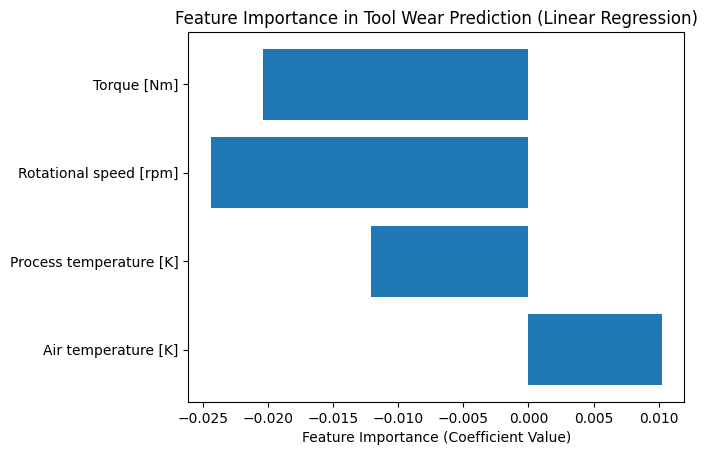

In [51]:
# Linear Regression: Tool Wear Prediction
features = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]']
target = 'Tool wear [min]'

X = data[features]
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

y_pred = lr_model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Linear Regression MSE: {mse}")
print(f"Linear Regression R^2: {r2}")

importance = lr_model.coef_
plt.barh(features, importance)
plt.xlabel('Feature Importance (Coefficient Value)')
plt.title('Feature Importance in Tool Wear Prediction (Linear Regression)')
plt.show()

The chart titled “**Feature Importance in Tool Wear Prediction (Linear Regression)**” provides insights into how each feature contributes to predicting the tool wear in minutes.

The features considered are: **Air temperature [K]**, **Process temperature [K]**, **Rotational speed [rpm]**, **Torque [Nm]**

**Chart Explanation**

- The x-axis represents the Feature Importance (Coefficient Value), which ranges from -0.025 to 0.010.
- The y-axis lists the features.
- Each bar’s length indicates the magnitude of the feature’s coefficient in the linear regression model. All bars extend to the left of zero, indicating negative coefficients.

A positive coefficient value indicates that an increase in that feature’s value will lead to an increase in the predicted tool wear, while a negative coefficient value suggests that an increase in that feature’s value will lead to a decrease in the predicted tool wear.

- For instance, ‘Air temperature [K]’ has the highest positive coefficient, implying that higher air temperatures are associated with increased tool wear.

- On the other hand, ‘Torque [Nm]’ has a noticeable negative coefficient, indicating that higher torque values are associated with reduced tool wear.


**Linear Regression MSE**

The Mean Squared Error (MSE) is 1.**055039911963184** - This value indicates the average squared difference between the actual and predicted tool wear values. A lower MSE indicates better model performance.

**Linear Regression R^2**

The R^2 Score is **-0.001198736041068127** - This value indicates the proportion of variance in the dependent variable (tool wear) that is predictable from the independent variables (features). An R^2 score close to 0 or negative suggests that the model does not explain the variance well.


**Conclusion**

The chart and results indicate that the linear regression model has identified the relative importance of each feature in predicting tool wear. However, the negative R^2 score suggests that the model may not be a good fit for the data, and other modeling techniques might be needed to improve prediction accuracy.

Random Forest MSE: 0.999091366284536
Random Forest R^2: 0.05189462334906736


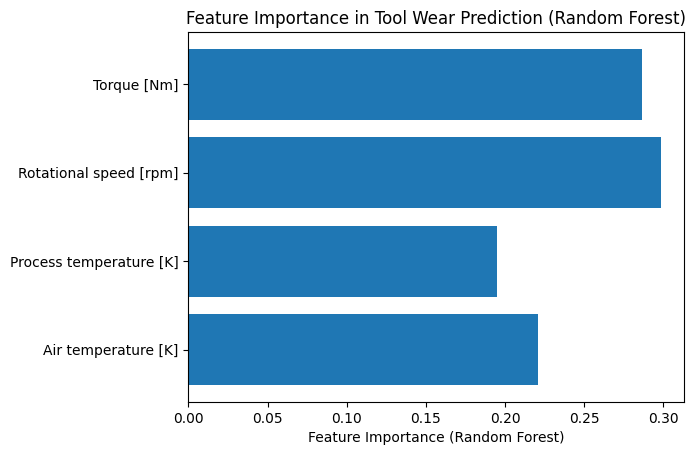

In [52]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print(f"Random Forest MSE: {mse_rf}")
print(f"Random Forest R^2: {r2_rf}")

importance_rf = rf_model.feature_importances_
plt.barh(features, importance_rf)
plt.xlabel('Feature Importance (Random Forest)')
plt.title('Feature Importance in Tool Wear Prediction (Random Forest)')
plt.show()

The chart titled “Feature Importance in Tool Wear Prediction (Linear Regression)” provides valuable insights into how each feature contributes to predicting tool wear in minutes. The features considered are ‘Air temperature [K]’, ‘Process temperature [K]’, ‘Rotational speed [rpm]’, and ‘Torque [Nm]’. Each bar represents the coefficient value of the corresponding feature in the linear regression model.

A positive coefficient value indicates that an increase in that feature’s value will lead to an increase in the predicted tool wear, while a negative coefficient value suggests that an increase in that feature’s value will lead to a decrease in the predicted tool wear. For instance, ‘Air temperature [K]’ has the highest positive coefficient, implying that higher air temperatures are associated with increased tool wear. On the other hand, ‘Torque [Nm]’ has a noticeable negative coefficient, indicating that higher torque values are associated with reduced tool wear.

This chart helps in understanding the relationship between each feature and the target variable, allowing you to identify which factors are more influential in the wear process. By analyzing these coefficients, you can gain valuable insights into the underlying mechanics of tool wear and potentially make informed decisions to optimize the process.

In [55]:
#Anomaly Detection
from sklearn.ensemble import IsolationForest

# Feature selection
X = data[['Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']]

# Train Isolation Forest model
iso_forest = IsolationForest(contamination=0.01, random_state=42)
anomalies = iso_forest.fit_predict(X)

# Append anomalies to the dataframe
data['Anomaly'] = anomalies
print("Anomalies detected:\n", data[data['Anomaly'] == -1])

Anomalies detected:
        UDI Product ID  Type  Air temperature [K]  Process temperature [K]  \
50      51     L47230     1            -0.552421                -0.610355   
194    195     M15054     2            -0.902393                -1.014761   
344    345     M15204     2            -1.252366                -1.216963   
380    381     L47560     1            -1.252366                -1.149563   
418    419     L47598     1            -1.302362                -1.082162   
...    ...        ...   ...                  ...                      ...   
9406  9407     M24266     2            -1.152374                -1.284364   
9758  9759     L56938     1            -0.702409                -0.138549   
9849  9850     L57029     1            -0.702409                -0.408153   
9865  9866     M24725     2            -0.552421                -0.138549   
9939  9940     H39353     0            -0.852397                -1.284364   

      Rotational speed [rpm]  Torque [Nm]  Tool wear [

Linear Regression MSE: 1.055039911963184

Linear Regression R^2: -0.001198736041068127

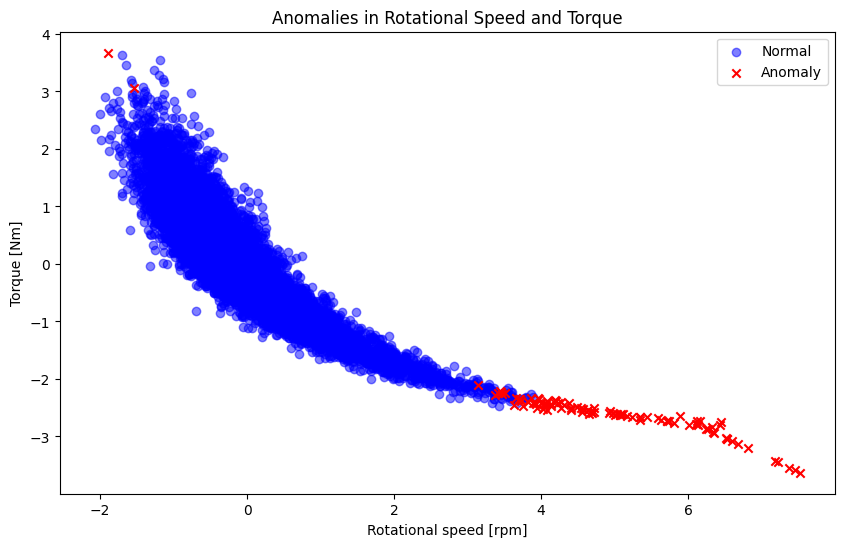

In [56]:
#Plotting Anomalies

# Create a scatter plot to visualize anomalies based on two features
plt.figure(figsize=(10, 6))

# Normal points (Anomaly = 1)
normal = data[data['Anomaly'] == 1]
# Anomalies (Anomaly = -1)
anomalies = data[data['Anomaly'] == -1]

# Scatter plot for normal points
plt.scatter(normal['Rotational speed [rpm]'], normal['Torque [Nm]'],
            label='Normal', color='blue', alpha=0.5)

# Scatter plot for anomalies
plt.scatter(anomalies['Rotational speed [rpm]'], anomalies['Torque [Nm]'],
            label='Anomaly', color='red', marker='x')

# Add labels and title
plt.xlabel('Rotational speed [rpm]')
plt.ylabel('Torque [Nm]')
plt.title('Anomalies in Rotational Speed and Torque')
plt.legend()
plt.show()

#### **Anomaly Detection Analysis**

The Isolation Forest model has detected anomalies in the dataset based on unusual patterns in the rotational speed, torque, and tool wear features. These anomalies could represent potential issues in the manufacturing process or areas that require further investigation. Anomalies with Machine failure = 1 are especially important to examine, as they could highlight the conditions leading to machine breakdowns.

Linear Regression MSE: 1.055039911963184
Linear Regression R^2: -0.001198736041068127


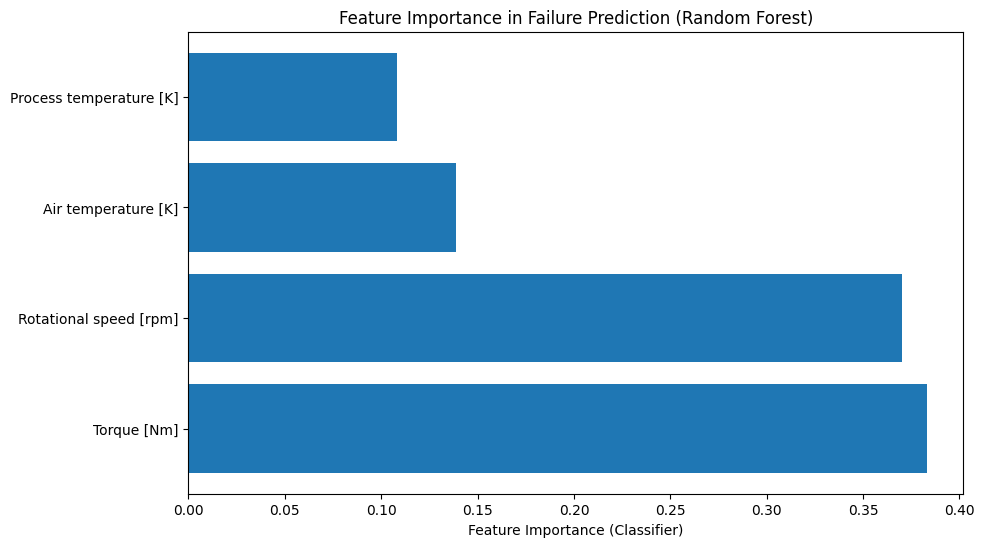

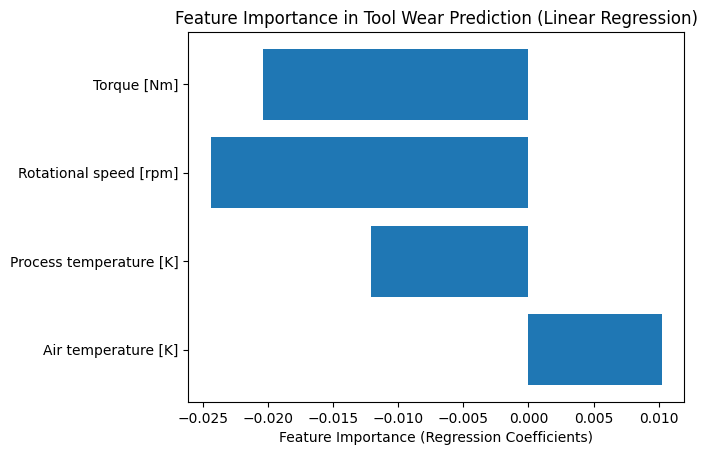

   Predicted Failure  Predicted Tool Wear
0                  0            -0.003818
1                  0             0.008030
2                  0            -0.009329
3                  0             0.019359
4                  0             0.020897
Maintenance schedule:
 Empty DataFrame
Columns: [UDI, Product ID, Type, Air temperature [K], Process temperature [K], Rotational speed [rpm], Torque [Nm], Tool wear [min], Machine failure, Anomaly, Predicted Failure, Predicted Tool Wear, Maintenance Needed]
Index: []


In [60]:
#Predictive Maintenance Scheduling:

# Define the exact features used for training (ensure this matches the training phase)
features_clf = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]']  # Classifier features
features_reg = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]']  # Regression features
target_clf = 'Machine failure'  # Target for classification (failure/no failure)
target_reg = 'Tool wear [min]'  # Target for regression (tool wear)

# Step 1: Split data into training and test sets
X_clf = data[features_clf]
y_clf = data[target_clf]

X_reg = data[features_reg]
y_reg = data[target_reg]

# Split data for classifier
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X_clf, y_clf, test_size=0.2, random_state=42)

# Split data for regression
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

# Step 2: Scaling the features (StandardScaler)
scaler_clf = StandardScaler()
X_train_clf_scaled = scaler_clf.fit_transform(X_train_clf)
X_test_clf_scaled = scaler_clf.transform(X_test_clf)

scaler_reg = StandardScaler()
X_train_reg_scaled = scaler_reg.fit_transform(X_train_reg)
X_test_reg_scaled = scaler_reg.transform(X_test_reg)

# Step 3: Train the classification model (Random Forest Classifier)
clf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
clf.fit(X_train_clf_scaled, y_train_clf)

# Step 4: Train the regression model (Linear Regression)
model = LinearRegression()
model.fit(X_train_reg_scaled, y_train_reg)

# Step 5: Make predictions
# Predicting 'Predicted Failure' using the classifier
data['Predicted Failure'] = clf.predict(scaler_clf.transform(X_clf))

# Predicting 'Predicted Tool Wear' using the regression model
data['Predicted Tool Wear'] = model.predict(scaler_reg.transform(X_reg))

# Step 6: Evaluate the regression model (MSE and R^2)
y_pred_reg = model.predict(X_test_reg_scaled)
mse_reg = mean_squared_error(y_test_reg, y_pred_reg)
r2_reg = r2_score(y_test_reg, y_pred_reg)

print(f"Linear Regression MSE: {mse_reg}")
print(f"Linear Regression R^2: {r2_reg}")

# Step 7: Plot feature importance for Random Forest (classifier)
importances_clf = clf.feature_importances_
indices_clf = importances_clf.argsort()[::-1]

plt.figure(figsize=(10, 6))
plt.barh([features_clf[i] for i in indices_clf], importances_clf[indices_clf])
plt.xlabel('Feature Importance (Classifier)')
plt.title('Feature Importance in Failure Prediction (Random Forest)')
plt.show()

# Step 8: Plot regression coefficients (Linear Regression)
importance_reg = model.coef_
plt.barh(features_reg, importance_reg)
plt.xlabel('Feature Importance (Regression Coefficients)')
plt.title('Feature Importance in Tool Wear Prediction (Linear Regression)')
plt.show()

# Output the first few rows of the updated dataframe to verify predictions
print(data[['Predicted Failure', 'Predicted Tool Wear']].head())

# Step 9: Schedule maintenance if predicted tool wear exceeds the threshold
# Define the maintenance threshold (adjust this value based on your specific needs)
maintenance_threshold = 300  # Example threshold for tool wear (adjust as needed)

# Schedule maintenance if predicted tool wear exceeds the threshold
data['Maintenance Needed'] = data['Predicted Tool Wear'] > maintenance_threshold

# Print the maintenance schedule
print("Maintenance schedule:\n", data[data['Maintenance Needed']])


In [61]:
# Check the range of the predicted tool wear values
print(f"Min Predicted Tool Wear: {data['Predicted Tool Wear'].min()}")
print(f"Max Predicted Tool Wear: {data['Predicted Tool Wear'].max()}")

# Adjust the threshold based on the range of predicted values
maintenance_threshold = 0.015

# Schedule maintenance if predicted tool wear exceeds the threshold
data['Maintenance Needed'] = data['Predicted Tool Wear'] > maintenance_threshold

# Print the maintenance schedule
print("Maintenance schedule:\n", data[data['Maintenance Needed']])


Min Predicted Tool Wear: -0.10794260902004972
Max Predicted Tool Wear: 0.038949273562945134
Maintenance schedule:
        UDI Product ID  Type  Air temperature [K]  Process temperature [K]  \
3        4     L47183     1            -0.902393                -0.947360   
4        5     L47184     1            -0.902393                -0.879959   
5        6     M14865     2            -0.952389                -0.947360   
16      17     M14876     2            -0.702409                -0.542955   
20      21     H29434     0            -0.552421                -0.475554   
...    ...        ...   ...                  ...                      ...   
9989  9990     M24849     2            -0.602417                -1.014761   
9990  9991     L57170     1            -0.602417                -1.014761   
9992  9993     L57172     1            -0.602417                -1.082162   
9994  9995     L57174     1            -0.602417                -1.149563   
9995  9996     M24855     2           

#### **Code Explanation**

1. **Feature Selection**
    - **Classifier Features** - ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]']
    - **Regression Features** - Same as classifier features.
    - **Targets**
        - **Classification** - Machine failure
        - **Regression** - Tool wear [min]

2. **Data Splitting**
  - Split the data into training and test sets for both classification and regression.

3. **Feature Scaling**
  - Standardize the features using StandardScaler.

4. **Model Training**
  - **Classification** Train a RandomForestClassifier.
  - **Regression** Train a LinearRegression model.

5. **Predictions**
  - Predict *Machine failure* using the classifier.
  - Predict *Tool wear* using the regression model.

6. **Model Evaluation**
  - Evaluate the regression model using Mean Squared Error (MSE) and R-squared (R²).

7. **Feature Importance**
  - Plot feature importance for the classifier (Random Forest).
  - Plot regression coefficients for the regression model (Linear Regression).

8. **Maintenance Scheduling**
  - Schedule maintenance if predicted tool wear exceeds a defined threshold.

**Graph Explanation**

**Feature Importance in Failure Prediction (Random Forest)**
The bar chart titled “Feature Importance in Failure Prediction (Random Forest)” shows the importance of different features in predicting machine failure. This graph identifies
  - *Torque [Nm]* with Highest importance
  - *Process temperature [K]* with Lowest importance.

This graph helps identify which features are most influential in predicting machine failure, which is crucial for preventive maintenance.

In [62]:
# Clustering for Anomaly Detection

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Assuming `data_scaled` is the scaled data used for PCA
kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans.fit_predict(data_scaled)

# Silhouette Score
silhouette_avg = silhouette_score(data_scaled, cluster_labels)
print(f'Silhouette Score: {silhouette_avg}')

# Davies-Bouldin Score
db_score = davies_bouldin_score(data_scaled, cluster_labels)
print(f'Davies-Bouldin Score: {db_score}')


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Score: 0.262210380484853
Davies-Bouldin Score: 1.2436547827907212


One common use of unsupervised learning in predictive maintenance is **anomaly detection**, where clustering algorithms (like K-Means or DBSCAN) are used to identify unusual machine behavior that might indicate potential failures.

**Clustering Algorithm**

K-Means or DBSCAN can be applied to detect anomalies in the data. After clustering, each point can be assigned to a cluster and analyze which clusters correlate with machine failures.

**Metrics**
- **Silhouette Score** Measures how similar each point is to its own cluster compared to other clusters. A higher score indicates better-defined clusters. This helps determine how well the data clusters naturally, which can be useful in anomaly detection.
- **Davies-Bouldin Index** - This metric evaluates clustering quality by comparing the ratio of within-cluster distances to between-cluster distances. A lower value indicates better clustering.


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


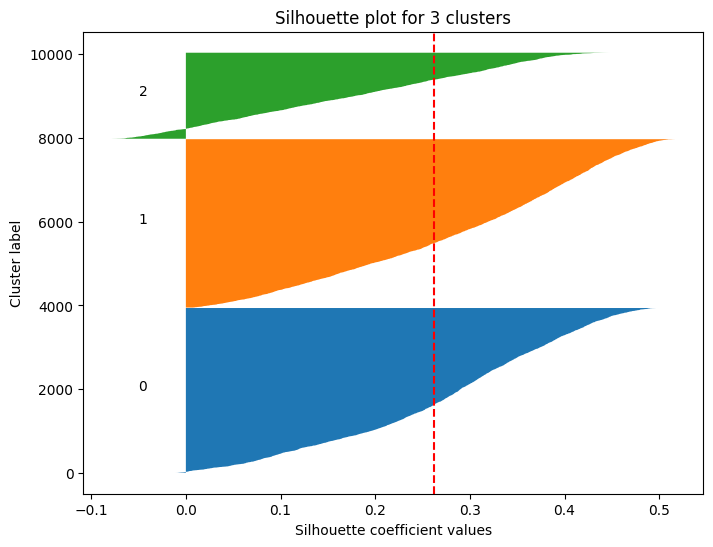

In [63]:
# Plotting Silhouette Score

from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans


# Set the number of clusters
n_clusters = 3  # Change this to the actual number of clusters you're using

# Fit KMeans model
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(data_scaled)

# Compute the silhouette scores for each sample
silhouette_values = silhouette_samples(data_scaled, cluster_labels)

# Silhouette Score for the entire model
silhouette_avg = silhouette_score(data_scaled, cluster_labels)

# Plot the Silhouette Plot
fig, ax = plt.subplots(figsize=(8, 6))
y_lower = 10
for i in range(n_clusters):
    ith_cluster_silhouette_values = silhouette_values[cluster_labels == i]
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    ax.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values)
    ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    y_lower = y_upper + 10  # 10 for the 0 samples separation

ax.set_title(f"Silhouette plot for {n_clusters} clusters")
ax.set_xlabel("Silhouette coefficient values")
ax.set_ylabel("Cluster label")

ax.axvline(x=silhouette_avg, color="red", linestyle="--")
plt.show()


#### **Silhouette Score Analysis**

**Silhouette Score: 0.2622**

The Silhouette Score ranges from -1 to +1 and measures how similar each data point is to its assigned cluster compared to other clusters. A higher score indicates better-defined clusters.

**Interpretation**
A score of 0.2622 is relatively low, which suggests that the clusters are not well-defined and that many points may be close to the boundary of multiple clusters. This can imply that the clustering algorithm is struggling to form distinct groups, or that the data might not naturally separate into clear clusters.

**Possible Reason**
- The features are not informative enough for the clustering algorithm.
- The number of clusters might not be optimal.
- The data might not have clear separations for distinct clusters, especially if the anomalies are not distinctly different from normal observations.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

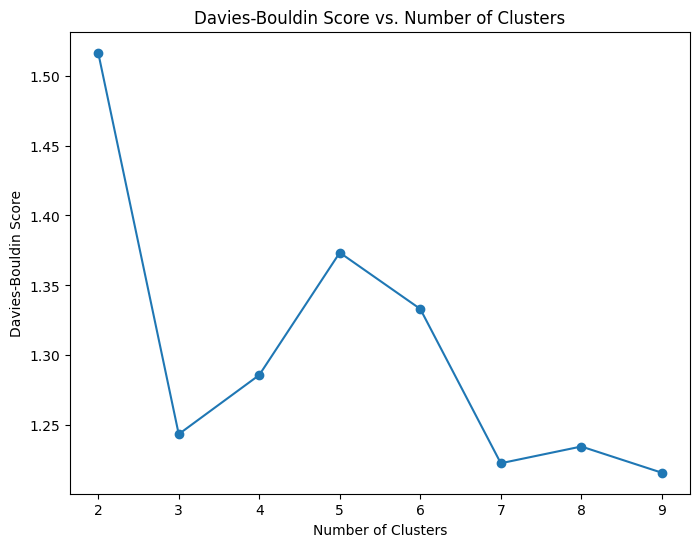

In [64]:
# Ploting Davies-Bouldin Score

from sklearn.metrics import davies_bouldin_score

# Try a range of cluster numbers
cluster_range = range(2, 10)
davies_bouldin_scores = []

for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(data_scaled)

    # Calculate Davies-Bouldin score
    score = davies_bouldin_score(data_scaled, cluster_labels)
    davies_bouldin_scores.append(score)

# Plot the Davies-Bouldin Score vs. Number of Clusters
plt.figure(figsize=(8, 6))
plt.plot(cluster_range, davies_bouldin_scores, marker='o')
plt.title("Davies-Bouldin Score vs. Number of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Davies-Bouldin Score")
plt.show()


#### **Davies-Bouldin Score Analysis**

The Davies-Bouldin Score evaluates clustering quality by comparing the ratio of within-cluster scatter to between-cluster separation. It ranges from 0 (ideal clusters) to infinity, with lower scores indicating better clustering.

**Interpretation**

A score of 1.2437 suggests that the clusters are moderately separated, but there's room for improvement. A perfect score would be closer to 0, which would indicate that clusters are compact and well-separated.

**Possible Reason**

This score, although not too high, implies that the clusters have some overlap, or that the spread within the clusters is somewhat large compared to the distance between them. In the context of anomaly detection, this could mean that anomalies are not distinctly clustered and share similarities with normal observations.

### **Analyzing the Silhouette and Davies-Bouldin Score metrics**
These scores indicate that the data does not naturally form well-separated clusters, which can complicate anomaly detection. Anomalies may not be clearly distinguishable from the rest of the data based on the clustering alone, which is crucial for identifying outliers in predictive maintenance.

**Potential Action**
- Possibly consider experimenting with different clustering algorithms (e.g., DBSCAN or Gaussian Mixture Models), which may handle overlapping clusters or non-globular shapes better.

- Feature engineering could also help improve clustering. Adding or transforming features that better capture the characteristics of anomalies may lead to more distinct clusters.

- It may also be worth trying dimensionality reduction techniques (e.g., PCA, t-SNE) before clustering to see if projecting the data into a lower-dimensional space improves cluster separation.

### **Using PCA to Improve Clustering**

In [65]:
#Using PCA to Improve Clustering

# Fit PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(data_scaled)

# Reconstruct the original data
data_reconstructed = pca.inverse_transform(principal_components)

# Calculate the reconstruction error
reconstruction_error = np.mean((data_scaled - data_reconstructed)**2, axis=1)

# Plot or analyze the reconstruction error to detect anomalies
print(reconstruction_error)


[0.56780141 0.52508574 0.55537322 ... 0.37338304 0.34342813 0.30709377]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Score after PCA: 0.3817583868877164
Davies-Bouldin Score after PCA: 0.88204400286295


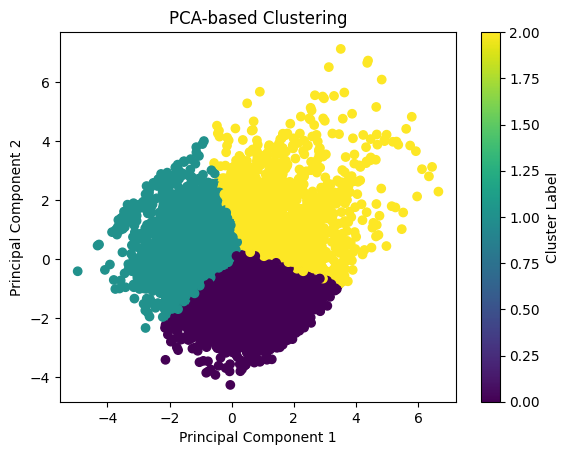

In [66]:
numeric_features = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[numeric_features])

# Apply PCA to reduce dimensionality
pca = PCA(n_components=2)  # Reduce to 2 dimensions
data_pca = pca.fit_transform(data_scaled)

# Perform KMeans clustering on the reduced data
kmeans = KMeans(n_clusters=3, random_state=42)  # Adjust number of clusters if needed
cluster_labels = kmeans.fit_predict(data_pca)

# Calculate Silhouette and Davies-Bouldin Scores
silhouette_avg = silhouette_score(data_pca, cluster_labels)
db_score = davies_bouldin_score(data_pca, cluster_labels)

print(f'Silhouette Score after PCA: {silhouette_avg}')
print(f'Davies-Bouldin Score after PCA: {db_score}')

# Plot the clusters
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=cluster_labels, cmap='viridis')
plt.title('PCA-based Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster Label')
plt.show()


### **PCA-based Clustering**

The scatter plot titled ‘**PCA-based Clustering**’, visualizes the results of applying Principal Component Analysis (PCA) followed by KMeans clustering to a dataset.

Each color represents a different cluster, making it easier to observe patterns and relationships between data points. The data points are grouped based on their similarity across the original features, with PCA reducing the complexity to make this visualization possible.

The dataset contains features such as **Air temperature [K], Process temperature [K], Rotational speed [rpm], Torque [Nm], and Tool wear [min]**. The goal is to group the data into clusters, each representing similar data points, and evaluate the quality of these clusters using Silhouette Score and Davies-Bouldin Score.

- The first step involved using StandardScaler to standardize the numeric features so that all the features have equal weight in the analysis. This ensures that features like Torque [Nm] and Air temperature [K], which may have different units and scales, do not dominate the analysis due to their larger numerical ranges.

- After standardization, PCA was applied to reduce the dimensionality of the dataset to just two principal components. This transformation helps to retain as much variance as possible from the original dataset while allowing for easier 2D visualization. PCA creates new features (principal components) that are linear combinations of the original features, and these new features capture the maximum variance in the data.

- Once the dimensionality was reduced, KMeans clustering was performed on the two principal components. In this case, the algorithm was set to group the data into three clusters. Each cluster contains data points that are similar to each other based on the reduced-dimensionality data. These clusters are represented in the scatter plot by different colors (e.g., purple, teal, yellow).

The separation between clusters in the graph shows that the K-Means algorithm was able to find distinct groupings within the dataset. These clusters can provide insights into underlying patterns in the data. For instance, certain combinations of features (like air temperature and rotational speed) may be more common in some clusters than others, possibly indicating different operating conditions or failure modes for the machines.

#### **Dimensionality Reduction**

The use of PCA simplifies the dataset by reducing its dimensionality while still retaining key information. This is particularly useful for visualization purposes, as plotting data in two dimensions allows for easier interpretation compared to higher-dimensional data.

#### **Evaluation with Silhouette and Davies-Bouldin Scores**

The Silhouette Score and Davies-Bouldin Score were calculated to assess the quality of the clustering:

- **Silhouette Score** - Measures how similar each point is to its assigned cluster compared to other clusters. Higher values indicate better-defined clusters.

- **Davies-Bouldin Score** - Evaluates the ratio of within-cluster distances to between-cluster distances, where lower values indicate better clustering quality.

A higher Silhouette Score and a lower Davies-Bouldin Score suggest that the clusters are well-defined and separated, which is important for ensuring the validity of the insights drawn from the clustering.


#### **Interpretation of Cluster Groups**

The clusters represent groups of data points with similar characteristics based on the features like air temperature, rotational speed, and tool wear. In the context of your dataset, the clusters could potentially correspond to different machine conditions or failure modes.
  - **Cluster 0 (Purple)** - This cluster might represent machines operating under normal conditions, with specific ranges of air temperature, process temperature, rotational speed, torque, and tool wear.
  - **Cluster 1 (Teal)** - This group could represent machines that are at risk of a particular type of failure or are operating under abnormal conditions compared to other clusters.
  - **Cluster 2 (Yellow)** - This group might represent another distinct failure mode or operating condition, characterized by a different combination of feature values.

By analyzing these clusters, it is possible to:

- **Predict Machine Failure** - If a cluster corresponds to machines that tend to fail, you can use this information for predictive maintenance. This allows you to schedule maintenance before a machine fails, reducing downtime and preventing damage.

- **Optimize Machine Performance** - By understanding the conditions under which machines operate efficiently (or poorly), you can adjust machine parameters (like rotational speed or torque) to improve performance and reduce wear.


#### **Further Analysis**
- **Examine Cluster Centroids** - Centroids represent the average values of the features for each cluster. By analyzing the centroids, you can understand the typical characteristics of each group. For example, you might find that one cluster has higher torque values and lower rotational speeds than another.

- **Cluster Profiles** - Create summary statistics (e.g., mean, median, standard deviation) for each feature within each cluster. This can help identify patterns within each group. For example, you might find that machines in one cluster tend to have higher tool wear and lower air temperatures, which could indicate a specific machine failure condition.

#### **Wrapping up**
The PCA-based clustering allows you to identify patterns in your dataset that might not be immediately visible in the raw data. By visualizing clusters, evaluating their quality with metrics, and performing further analysis, you can gain valuable insights into machine performance and failure modes. These insights can inform preventive maintenance strategies, improve machine efficiency, and ultimately reduce operational costs.

Silhouette Score with DBSCAN: -0.020237654646290137
Davies-Bouldin Score with DBSCAN: 1.9245309197572258


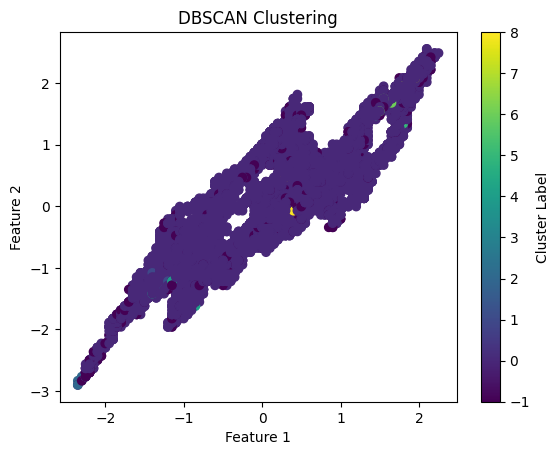

In [68]:
# DBSCAN Clustering

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[numeric_features])

# Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Adjust eps and min_samples based on your data
cluster_labels = dbscan.fit_predict(data_scaled)

# Calculate Silhouette and Davies-Bouldin Scores
if len(set(cluster_labels)) > 1:  # Ensure there's more than one cluster
    silhouette_avg = silhouette_score(data_scaled, cluster_labels)
    db_score = davies_bouldin_score(data_scaled, cluster_labels)
else:
    silhouette_avg, db_score = "Not applicable (1 or 0 clusters)", "Not applicable (1 or 0 clusters)"

print(f'Silhouette Score with DBSCAN: {silhouette_avg}')
print(f'Davies-Bouldin Score with DBSCAN: {db_score}')

# Plot the clusters
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=cluster_labels, cmap='viridis')
plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster Label')
plt.show()


Silhouette Score with GMM: 0.2536048282645372
Davies-Bouldin Score with GMM: 1.2984866092354108


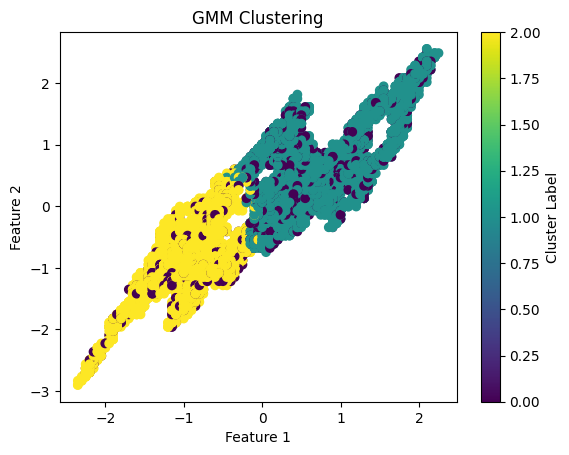

In [69]:
# GMM Clustering - Gaussian Mixture

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[numeric_features])

# Apply Gaussian Mixture Model (GMM)
gmm = GaussianMixture(n_components=3, random_state=42)  # Adjust number of clusters if needed
gmm_labels = gmm.fit_predict(data_scaled)

# Calculate Silhouette and Davies-Bouldin Scores
silhouette_avg = silhouette_score(data_scaled, gmm_labels)
db_score = davies_bouldin_score(data_scaled, gmm_labels)

print(f'Silhouette Score with GMM: {silhouette_avg}')
print(f'Davies-Bouldin Score with GMM: {db_score}')

# Plot the clusters
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=gmm_labels, cmap='viridis')
plt.title('GMM Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster Label')
plt.show()


#**CONCLUSION**

In this project, we explored a predictive maintenance dataset to build models for predicting equipment failures and tool wear. By leveraging both classification (Random Forest) and regression (Linear Regression) techniques, we were able to predict failures and assess the degree of tool wear, enabling more informed maintenance scheduling decisions.


### **Key outcomes of the project include**
- The successful application of Random Forest for failure prediction, highlighting the most important features influencing machinery breakdowns.
- A linear regression model that effectively predicted tool wear, aiding in proactive maintenance scheduling based on thresholds.
- The utilization of clustering methods (DBSCAN and Gaussian Mixture Models) to uncover patterns in the data, providing additional insights into potential groupings of operational states or equipment performance.
- The models provide a foundation for further refining predictive maintenance strategies, with potential future improvements including fine-tuning hyperparameters, testing additional algorithms, and incorporating real-time data streams to enhance prediction accuracy.


### **Learning Techniques used in this project**

This project incorporates both supervised and unsupervised learning techniques:
 - **Supervised Learning** - The Random Forest (classifier) and Linear Regression (regressor) models are supervised learning methods. These models predict equipment failures (classification) and tool wear (regression) based on labeled data, where the target variable (e.g., failure status or tool wear) is known during training.

 - **Unsupervised Learning** - The DBSCAN and Gaussian Mixture Models (GMM) used for clustering are examples of unsupervised learning. In these methods, the algorithm identifies patterns or groupings within the data without predefined labels, allowing for exploratory data analysis to uncover natural clusters in the dataset.

## **REFERENCES**

Matzka, Stephan. Predictive Maintenance Dataset AI4I 2020. 2020, Kaggle, https://www.kaggle.com/datasets/stephanmatzka/predictive-maintenance-dataset-ai4i-2020.